<a href="https://colab.research.google.com/github/SigridKnag/Master-Thesis-2023/blob/main/masterthesis_2023_sk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries and install packages

In [ ]:
!pip install geemap         # --> Google Earth Engine (GEE)
!pip install geopandas      #--> Geospatial data 
%pip install scikit-learn   #--> Machine learning 
!pip install pyshp           #--> Working with shapefiles
!pip install pycrs          #--> Python GIS package
!pip install shap

# Talking with local terminal on your computer
import os

# GEE
import ee
from geemap.conversion import js_snippet_to_py
import geemap
from geemap import ml

# Geospatial data manipulation and analysis tools
import geopandas as gpd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import tensorflow as tf
import seaborn as sns
import time
import math

# Machine learning with sci-kit learn
from sklearn import ensemble, metrics
from sklearn.model_selection import train_test_split, learning_curve, validation_curve, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.datasets import (make_blobs,
                              make_circles,
                              make_moons)
from sklearn.cluster import KMeans, SpectralClustering, DBSCAN
from sklearn.metrics import silhouette_score, f1_score

import scipy.stats as stats

# Statistical tests
import statsmodels.api as sm
from scipy.stats import shapiro 
import scipy.stats as stat
from math import sqrt
import shap


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 30.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 81.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.5/130.5 kB 19.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 97.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 80.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 105.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.4/55.4 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 87.2 MB/s eta 0:00:00
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11124 sha256=0eba7cac19c544c6c9f2d0de85e9feaa201cd6219c75d94d0a71

In [ ]:
# Check which prorcessor unit we are using
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
# Initialize access to GEE
Map = geemap.Map()

# 0) Follow external link 
# 1) Choose project name
# 2) "Generate token"
# 3) Choose account
# 4) Give access (check of both boxes)
# 5) Copy authorization code
# 6) Add authorization code below

To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://code.earthengine.google.com/client-auth?scopes=https%3A//www.googleapis.com/auth/earthengine%20https%3A//www.googleapis.com/auth/devstorage.full_control&request_id=9zxjkZY6Kuhwr4v92_SEc0fQzi666JcsmldzAZBAfxk&tc=RoLUng-fhEY8uBUxRuIEhdNX9tHvWq68yShbMU1mxdo&cc=xGVrHj1LefYW8D0WJhrv5be1hIJTb7M-YN5QyS_2Oh4

The authorization workflow will generate a code, which you should paste in the box below.
Enter verification code: 4/1AbUR2VOjFoQtQ2EGa_UpsSGhHOXzSz3xm1dPjhyECbKHQAhFRR0yA24jJEA

Successfully saved authorization token.


# Functions
- Deglint
- Remove duplicates
- Tau
- Variance
- Confusion matrix
- CM maker

Deglint

In [ ]:

# Deglint function
def deglint(img, glint):
  '''
  Sun-glint correction of image
  '''
  # Blue (B2) and NIR (B8) 
  # linearfitB gets linear relationship (slope) and offset between the Blue and NIR bands
  linearfitB = img.select(['B8','B2']).reduceRegion(
    **{
    'reducer': ee.Reducer.linearFit(),  
    'geometry': glint,
    'scale':10,
    'maxPixels':1e9
    }) 

  # Green (B3) and NIR (B8)
  # linearfitG gets linear relationship (slope) and offset between the Green and NIR bands  
  linearfitG = img.select(['B8','B3']).reduceRegion(
     **{
      'reducer': ee.Reducer.linearFit(),
      'geometry': glint,
      'scale':10,
      'maxPixels':1e9
      })  
  # Red (B4) and NIR
  # linearfitR gets linear relationship (slope) and offset between the Red and NIR bands
  linearfitR = img.select(['B8','B4']).reduceRegion(
    **{
      'reducer': ee.Reducer.linearFit(),
      'geometry': glint,
      'scale':10,
      'maxPixels':1e9
      })
  
  
  slopeImage = ee.Dictionary(            # Collects the slopes in a dictionary 
  {
      'Blue': linearfitB.get('scale'),
      'Green': linearfitG.get('scale'),
      'Red': linearfitR.get('scale')
      }).toImage()                        # Converts dicitonary to image
      
  # Define minimum NIR value.
  # Source code: https://gis.stackexchange.com/questions/331890/wgs84-projection-is-invalid-for-aggregations . Accessed 02.03.23 
  minNIR = img.select('B8').reduceRegion(ee.Reducer.min(), glint, 10).toImage()
  # Deglint formula
  return img.select(['B2','B3', 'B4']).subtract(slopeImage.multiply(img.select('B8').subtract(minNIR)))




Removing duplicates

In [ ]:
# Function to remove duplicates from a dataset
  def remove_duplicates(data):

  # Get the class column name
  label = data.columns[-1]

  # remove all duplicates
  data_ndup = data.drop_duplicates()

  # Check for imbalance in dataset
  minimum = min(data_ndup[label].value_counts())

  # Correct for imbalance in dataset
  # source code: https://stackoverflow.com/questions/52935324/make-dataframe-balanced-with-respect-to-a-specific-column. Accessed 13.03.23
  data_ndup = (data_ndup.groupby(label, as_index=False)
        .apply(lambda x: x.sample(n=minimum))
        .reset_index(drop=True))
  return data_ndup

 Confusion matrix

In [ ]:
def cm_datsets(cm1, cm2, cm3, cm4, cm5, title):
  '''
  Insert two different confusion matrices (cms) created with sci-kit learns:
  cm = confusion_matrix(y_true,y_pred)
  '''

  # Plot confusion matrices next to each other 
  # Source code: https://stackoverflow.com/questions/61016110/plot-multiple-confusion-matrices-with-plot-confusion-matrix. Accessed 21.03.23
  font_dict = {'fontsize': 15,
              'fontweight':15}

  font = {
      'weight' : 'bold',
      'size'   : 15}

  fig, ax = plt.subplots(1, 5, figsize=(25,8), sharex = True, sharey = True)
  fig.suptitle(str(title), fontsize=20)
  ax[0].set_title("Dataset 1")
  ax[1].set_title("Dataset 2")
  ax[2].set_title("Dataset 3")
  ax[3].set_title("Dataset 4")
  ax[4].set_title("Dataset 5")
  names=['water', 'seaweed', 'seagrass']

  metrics.ConfusionMatrixDisplay(
  confusion_matrix = cm1/cm1.astype(float).sum(axis=0), display_labels=names).plot(ax=ax[0], cmap='Blues') # values_format= '2g'

  metrics.ConfusionMatrixDisplay(
  confusion_matrix =cm2/cm2.astype(float).sum(axis=0), display_labels=names).plot(ax=ax[1], cmap='Blues')

  metrics.ConfusionMatrixDisplay(
  confusion_matrix =cm3/cm3.astype(float).sum(axis=0), display_labels=names).plot(ax=ax[2], cmap='Blues')

  metrics.ConfusionMatrixDisplay(
  confusion_matrix =cm4/cm4.astype(float).sum(axis=0), display_labels=names).plot(ax=ax[3], cmap='Blues')

  metrics.ConfusionMatrixDisplay(
  confusion_matrix =cm5/cm5.astype(float).sum(axis=0), display_labels=names).plot(ax=ax[4], cmap='Blues')

  #values_formatstr
  plt.rc('font', **font)
  plt.tight_layout()  
  return plt.show()

Tau and variance functions

In [ ]:
def tau(pra_x):
  pre = 0.33333                  #chance from three classes are 0.3333  
  return (pra_x - pre)/(1-pre)

def variance(data, accuracy):
  pre = 0.33333 
  return accuracy*(1-accuracy)/(len(data)*((1-pre)**2))

CM maker

In [ ]:
#from sklearn.metrics import confusion_matrix
# Source code: https://stackoverflow.com/a/59839952. Accessed: 03.05.2023

def cm_maker(cmx, title):
  cm = cmx/cmx.astype(float).sum(axis=0)

  # figure(figsize=(WIDTH_SIZE,HEIGHT_SIZE))
  plt.figure(figsize=(5,4))
  ax = plt.subplot()
  sns.set(font_scale=1.2) # Adjust to fit
  sns.heatmap(cm, annot=True, ax=ax, cmap="Blues", fmt=".2g");  

  # Labels, title and ticks
  label_font = {'size':'18'}  # Adjust to fit
  ax.set_xlabel('Predicted labels', fontdict=label_font);
  ax.set_ylabel('Tru labels', fontdict=label_font);

  title_font = {'size':'21'}  # Adjust to fit
  ax.set_title(title, fontdict=title_font);

  ax.tick_params(axis='both', which='major', labelsize=13)  # Adjust to fit
  ax.xaxis.set_ticklabels(['Water', 'Seaweed', 'Seagrass']);
  ax.yaxis.set_ticklabels(['Water', 'Seaweed', 'Seagrass']);
  return plt.show()

# Collecting training data

In [ ]:
# Source code: https://developers.google.com/earth-engine/guides/ic_info. Accessed: 16.02.2023
point = ee.Geometry.Point([-69.740859, 43.544235]) # Center around a specified point

# Criteria for maximum cloudiness
MAX_CLOUD_PROBABILITY = 5
CLOUD_THRES = 5

# Get the least cloudy image
image_train = (
    ee.ImageCollection('COPERNICUS/S2_SR')         # Dataset from GEE
    .filterBounds(point)                           # Filter satellite-images around our region of interest (ROI)
    .filterDate('2019-06-02','2019-10-01')         # Filter time
    .sort('CLOUDY_PIXEL_PERCENTAGE')               # fiter for cloud percentage
    .first()                                       # Take the image with least cloud coverage
    .select('B[2-4]','B[8]')                       # Select bands B2, B3, B4, and B8 as features
)

# Create a collection of images over a time-periode for training data
s2_coll_train = (ee.ImageCollection('COPERNICUS/S2_SR')
            .filterBounds(point)  # Filter satellite-images around our region of interest (ROI)
            .filterDate('2019-06-02','2019-10-01')
            .filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE', CLOUD_THRES))
    )

# Create a composite training image using min-value
s2_composite_min=s2_coll_train.select(['B[2-4]','B[8]']).min()
# Create a composite training image using the median-value
s2_composite_median = s2_coll_train.select(['B[2-4]','B[8]']).median()
 
print('Number of images fulfilling the cloud-coverage critera that will be used to make a composite image:', s2_coll_train.size().getInfo())
print('The least cloudy image was taken (YYYY-MM-DD):', ee.Date(image_train.get('system:time_start')).format('YYYY-MM-dd').getInfo())
cloud_perc = image_train.get('CLOUDY_PIXEL_PERCENTAGE').getInfo()*100
print(f'Cloud percentage: {cloud_perc:,.2f}% of the least cloudy image')
print('features available:', s2_composite_min.bandNames().getInfo())

Number of images fulfilling the cloud-coverage critera that will be used to make a composite image: 4
The least cloudy image was taken (YYYY-MM-DD): 2019-07-19
Cloud percentage: 3.15% of the least cloudy image
features available: ['B2', 'B3', 'B4', 'B8']


In [ ]:
# Instantiate a new map
Map = geemap.Map()
Map.set_center(-69.740859, 43.544235, zoom=10)

# Visually inspect the least cloudy image and composite images given median and minimum values  
vis_params = {"bands": [ 'B2', 'B3', 'B4'], "min": 0, "max": 1500, "gamma": 3.5}
Map.addLayer(image_train, vis_params, 'Least cloudy sent-2 image')
Map.addLayer(s2_composite_median, vis_params, 'Sent-2 median')
Map.addLayer(s2_composite_min, vis_params, 'Sent-2 min')

# Use toolbar on the left side, e.g., " Draw a rectangle" over an area 
# to extract NIR values (min and random) from two pixels. 
# Areas of deep waters are recommended.
Map

Map(center=[43.544235, -69.740859], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBo…

# Sunglint correcting Casco Bay image

In [ ]:
##Sun-glint correction
# Adaptation from https://www.youtube.com/watch?v=_V0X1LdSta4. Accessed 10.02.2023.
shp_path_glint_train = '/content/glint_train.shp'
glint = geemap.shp_to_ee(shp_path_glint_train) # Stores the rectangle(s) geometry to extract NIR-values from

# Store glint_train locally for reproducability 
#Map.draw_features                                # Collects the drawn rectangle(s)
#glint = ee.FeatureCollection(Map.draw_features)  # Stores the rectangle(s) geometry to extract NIR-values from
#geemap.ee_to_shp(glint, filename='/content/glint_train.shp') 


# Deglinted image
S2_deglint = deglint(s2_composite_min, glint) 

# Creating land/water mask of sun-glint corrected Casco Bay image 

In [ ]:
mask = S2_deglint.gt(0)                              # Using threshold 0 to distinguish land from ocean.
s2_deglint_masked = S2_deglint.updateMask(mask)      # Ocean mask 

NIR_thres = 500
b8 =s2_composite_min.select('B8')

# Source code: 
p. Accessed: 23.03.23
threshold = b8.where(b8.gt(NIR_thres),1).where(b8.lt(NIR_thres),0)

# Source code: https://www.youtube.com/watch?v=qO3Te5pfOHc. Accesssed: 23.03.23
S2_masked = threshold.updateMask(threshold)    # Land mask

# Display layers
vis_params_deglint = {"bands": [ 'B2', 'B3','B4'], "min": 0, "max": 1500, 'gamma':3.5}  # Visible parameters 

Map.addLayer(S2_deglint, vis_params_deglint, 'sun-glint corrected Sent-2')              # Deglinter image  
Map.addLayer(s2_deglint_masked, vis_params_deglint, 'masked Sent-2 deglinted image')    # Ocean layer without land
Map.addLayer(S2_masked, {'palette': ['black']} , 'S2 Land Mask')                        # Land mask with black color
Map

Map(bottom=96080.0, center=[43.544235, -69.740859], controls=(WidgetControl(options=['position', 'transparent_…

In [ ]:
# Calculating NDVI
nir = s2_composite_min.select('B8')
red = s2_composite_min.select('B4')
ndvi_image = nir.subtract(red).divide(nir.add(red)).rename('NDVI')

# Add NIR-band to deglinted image
s2_deglint_masked = s2_deglint_masked.addBands(nir)

# Add NDVI to RGB-image and deglinted image
s2_deglint_masked = s2_deglint_masked.addBands(ndvi_image)
Map

Map(bottom=96080.0, center=[43.544235, -69.740859], controls=(WidgetControl(options=['position', 'transparent_…

In [ ]:
# Store region of interst (training) locally for reproducability 
# roi_train = ee.FeatureCollection(Map.draw_last_feature)
#geemap.ee_to_shp(roi_train, filename='/content/roi_train.shp') 

shp_path_roi_train = '/content/roi_train.shp'
roi_train = geemap.shp_to_ee(shp_path_roi_train)

#Citations:
# Amante, C. and B. W. Eakins, ETOPO1 1 Arc-Minute Global Relief Model: Procedures, Data Sources and Analysis. 
# NOAA Technical Memorandum NESDIS NGDC-24, 19 pp, March 2009.

# Import elevation dataset from GEE
dataset = ee.Image('NOAA/NGDC/ETOPO1')
bathymetry_clipped = dataset.clip(roi_train)

# Extract band 'bedrock' and rename it bathymetry for convenience
bathymetry = bathymetry_clipped.select('bedrock').rename('bathymetry')

# Add bathymetry band to deglinted and raw image
s2_deglint_masked = s2_deglint_masked.addBands(bathymetry)

# Add NDVI-image to map
ndviParams = {min: -1, max: 1, 'palette': ['blue', 'white', 'green']}
Map.addLayer(ndvi_image, ndviParams, 'NDVI image')
Map.addLayer(roi_train, {}, 'training site')

# Add bathymetry data on the map
bathymetryVis = {
  'min': -7000.0,
  'max': 3000.0,
  'palette': ['011de2', 'afafaf', '3603ff', 'fff477', 'b42109'],
}
Map.addLayer(bathymetry, bathymetryVis, 'bathymetry')
Map

Map(bottom=96080.0, center=[43.544235, -69.740859], controls=(WidgetControl(options=['position', 'transparent_…

In [ ]:
# Add ground truth data geometry of seagrass, seaweed, and water
shp_path_SW = '/content/Coastal_Marine_Geology.shp'
seaweed_shp = geemap.shp_to_ee(shp_path_SW)

shp_path_SG = '/content/MaineDEP_-_Eelgrass_2018_(Casco_Bay_Only).shp'
seagrass_shp = geemap.shp_to_ee(shp_path_SG)

# Drew rectangles to represent water, than downloaded them locally
# geemap.ee_to_shp(water, filename='/content/water.shp')
shp_path_water = '/content/water.shp'
water_shp = geemap.shp_to_ee(shp_path_water)

In [ ]:
# increase sample size of seaweed
sample_sw = s2_deglint_masked.sample(**{
  'region': seaweed_shp.geometry(),
  'numPixels':5000,  # Collect only a 100 datapoints from the geometries to as there as so few polygons of seagrass in the area
  'geometries': True,
  'seed' :3,
  'scale': 10,   # Set to 10 as our resolution is 10-meters
})

sample_sg = s2_deglint_masked.sample(**{
  'region': seagrass_shp.geometry(),
  'numPixels':5000,   
  'geometries': True,
  'seed' :3,
  'scale': 10,
})

sample_water = s2_deglint_masked.sample(**{
  'region': water_shp.geometry(),
  'numPixels':5000,
  'geometries': True,
  'seed' :3,
  'scale': 10,
})

# Convert samples from ee-objects to geodataframes
gdf_sw = geemap.ee_to_geopandas(sample_sw)
gdf_sg = geemap.ee_to_geopandas(sample_sg)
gdf_water = geemap.ee_to_geopandas(sample_water)

# Get number of samples fetched for each class
length_sg = len(gdf_sg)
length_sw = len(gdf_sw)
length_water = len(gdf_water)
print(f'We have: \n {length_sg} samples from the seagrass polygons \n {length_sw} samples from the seaweed polygons \n {length_water} samples from the water polygons ')

 # Crete Class column 'Cover'
gdf_water['Cover'] =  int(1) # class water
gdf_sw['Cover'] =  int(2)    # class seaweed
gdf_sg['Cover'] =  int(3)    # class seagrass


# Merge the three dataframes and create a single dataset
# Source code: https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html. Accessed 08.02.23
frames = [gdf_water, gdf_sw, gdf_sg]

data = pd.concat(frames, ignore_index=True)
print(len(data))

We have: 
 4874 samples from the seagrass polygons 
 939 samples from the seaweed polygons 
 4992 samples from the water polygons 
10805


# Visually compare the sample points to the ground truth polygons. 

In [ ]:
Map = geemap.Map()
Map.set_center(-69.740859, 43.544235, zoom=10)

vis_params = {"bands": [ 'B2', 'B3', 'B4'], "min": 0, "max": 1500, "gamma": 1.5}
Map.addLayer(image_train, vis_params, 'Sent-2 image')
Map.addLayer(s2_composite_min, vis_params, 'Sent-2 min')

vis_params_deglint = {"bands": [ 'B2', 'B3','B4'], "min": 0, "max": 1500, 'gamma':1.5}

Map.addLayer(S2_deglint, vis_params_deglint, 'sun-glint corrected Sent-2')
Map.addLayer(s2_deglint_masked, vis_params_deglint, 'masked Sent-2 deglinted image')

vis_params_sw = {'color':'#7b3e00'}
vis_params_sg = {'color':'1c5f2c'} 
vis_params_water = {'color':'#0d98ba'}  

# Ground truth polygons 
Map.addLayer(seagrass_shp, vis_params_sg, 'seagrass')
Map.addLayer(seaweed_shp, vis_params_sw, 'seaweed')
Map.addLayer(water_shp, vis_params_water, 'water')

# Sample points
#Map.addLayer(sample_sg, vis_params_sg, 'seagrass samples')
#Map.addLayer(sample_sw, vis_params_sw, 'seaweed samples')
#Map.addLayer(sample_water, vis_params_water, 'water samples')
Map

Map(center=[43.544235, -69.740859], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBo…

# OBIA-method at the training site

In [ ]:
# Select seed-pixels for clustering, spaced at least 36 pixels apart. Clipped to region of interest.  
seeds = ee.Algorithms.Image.Segmentation.seedGrid(36).clip(roi_train)

# Run SNIC --> create super-pixels
snic = ee.Algorithms.Image.Segmentation.SNIC(**{
  'image': s2_deglint_masked,                     # Image to create superpixels                    
  'size': 32,                                     # Spacing between each seed in pixels. Each seed are 32 pixels away from each other       
  'compactness': 5,                               # How compact the super-pixels should be. Larger values creates squares, small more organic patterns
  'connectivity': 8,                              # Number of pixels that can be connected to one pixel. 4 means the pixels around one that shares a side, 8 means also those pixels who touches the corners of a pixel. 
  'neighborhoodSize':256,                         # 
  'seeds': seeds                                  # Square grid of seeds. Each seed with a spacing of 36 pixels inbetween them. 
})

# Outputs average values for the super-pixels 
snic.bandNames().getInfo()

['clusters',
 'B2_mean',
 'B3_mean',
 'B4_mean',
 'B8_mean',
 'NDVI_mean',
 'bathymetry_mean']

In [ ]:
#Display the clusters.
Map.addLayer(snic.randomVisualizer(), None, 'Clusters')
# Display the RGB cluster means.
visParams = {
  'bands': ['B4_mean', 'B3_mean', 'B2_mean'],
  'min': 0,
  'max': 255
}

vis_params_sw = {'color':'#7b3e00'}
vis_params_sg = {'color':'1c5f2c'} 

Map.addLayer(snic, visParams, 'RGB cluster means')
#Map.addLayer(S2_masked, {'palette': ['black']} , 'S2 Land Mask')
#Map.addLayer(seagrass_shp, vis_params_sg, 'seagrass')
#Map.addLayer(seaweed_shp, vis_params_sw, 'seaweed')
Map

Map(bottom=765082.7388728482, center=[43.72561622035781, -69.9768711867684], controls=(WidgetControl(options=[…

In [ ]:
'''
# In order to try to still the image (avoid the super-pixels to change with scale), code commented out here is used. Did not work...
# source code: https://gis.stackexchange.com/questions/333413/is-google-earth-engine-snic-segmentation-algorithm-inconsistent. Accessed 10.02.23
snic.reproject(**{
  'crs': 'EPSG:4326',
  'scale': 10
})

# Source code: https://developers.google.com/earth-engine/apidocs/ee-algorithms-image-segmentation-snic. 10.02.23
# Lock map zoom to maintain the desired scale of the segmentation computation.
'''
# Using super-pixels to get object-based features: 
clusters = snic.select('clusters') 

#Area
area = ee.Image.pixelArea().addBands(clusters).reduceConnectedComponents(ee.Reducer.sum(), 'clusters', 256)
#Map.addLayer(area, {min:50000, max: 500000}, 'Cluster Area', False)

minMax = clusters.reduceNeighborhood(ee.Reducer.minMax(), ee.Kernel.square(1))
perimeterPixels = minMax.select(0).neq(minMax.select(1)).rename('perimeter')

# Perimeter
perimeter = perimeterPixels.addBands(clusters).reduceConnectedComponents(ee.Reducer.sum(), 'clusters', 256);

# Width and Height
sizes = ee.Image.pixelLonLat().addBands(clusters).reduceConnectedComponents(ee.Reducer.minMax(), 'clusters', 256)
width = sizes.select('longitude_max').subtract(sizes.select('longitude_min')).rename('width')
height = sizes.select('latitude_max').subtract(sizes.select('latitude_min')).rename('height')

bands = ['B2_mean', 'B3_mean', 'B4_mean', 'B8_mean','clusters', 'bathymetry_mean','NDVI_mean']

# objectPropertiesImage is now an image containing 11 feautres.  
objectPropertiesImage = ee.Image.cat([
  snic.select(bands).rename(['clusters', 'B2', 'B3', 'B4', 'B8', 'NDVI', 'bathymetry']),
  area,
  perimeter,
  width,
  height
]).float()

# Image with now 11 features and super-pixels
objectPropertiesImage.bandNames().getInfo()


['clusters',
 'B2',
 'B3',
 'B4',
 'B8',
 'NDVI',
 'bathymetry',
 'area',
 'perimeter',
 'width',
 'height']

In [ ]:
# Use functions below if data to get sample data fro training, validaiton and test. 
# To save time, these sets have already been created and stored locally.
# The files used her ecan be found with the rest on git-hub for reproducable results.

# increase sample size of seaweed
sample_sw = objectPropertiesImage.sample(**{
  'region': seaweed_shp,
  'numPixels':5000,  # Collect only a 100 datapoints from the geometries to as there as so few polygons of seagrass in the area
  'geometries': True,
  'seed' :5,
  'scale': 10,   # Set to 10 as our resolution is 10-meters
})

sample_sg = objectPropertiesImage.sample(**{
  'region': seagrass_shp,
  'numPixels':5000,   
  'geometries': True,
  'seed' :5,
  'scale': 10,
})

sample_water = objectPropertiesImage.sample(**{
  'region': water_shp.geometry(),
  'numPixels':5000,
  'geometries': True,
  'seed' :5,
  'scale': 10,
})

# Convert samples from ee-objects to geodataframes
gdf_sw = geemap.ee_to_geopandas(sample_sw)
gdf_sg = geemap.ee_to_geopandas(sample_sg)
gdf_water = geemap.ee_to_geopandas(sample_water)

# Get number of samples fetched for each class
length_sg = len(gdf_sg)
length_sw = len(gdf_sw)
length_water = len(gdf_water)
print(f'We have: \n {length_sg} samples from the seagrass polygons \n {length_sw} samples from the seaweed polygons \n {length_water} samples from the water polygons ')

 # Crete Class column 'Cover'
gdf_water['Cover'] =  int(1) # class water
gdf_sw['Cover'] =  int(2)    # class seaweed
gdf_sg['Cover'] =  int(3)    # class seagrass


# Merge the three dataframes and create a single dataset
# Source code: https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html. Accessed 08.02.23
frames = [gdf_water, gdf_sw, gdf_sg]

data = pd.concat(frames, ignore_index=True)
print(len(data))


We have: 
 4999 samples from the seagrass polygons 
 952 samples from the seaweed polygons 
 4815 samples from the water polygons 
10766


In [ ]:
# Visually inspect that the samples are drawn from the training site 
Map = geemap.Map()
Map.set_center(-69.740859, 43.544235, zoom=10)

# Visually inspect the image and composite iamges created  
vis_params = {"bands": [ 'B2', 'B3', 'B4'], "min": 0, "max": 1500, "gamma": 1.5}
Map.addLayer(image_train, vis_params, 'Sent-2 image')

vis_params_sw = {'color':'#7b3e00'}
vis_params_sg = {'color':'1c5f2c'} 
vis_params_water = {'color':'#0d98ba'}  

Map.addLayer(seagrass_shp, vis_params_sg, 'seagrass')
Map.addLayer(seaweed_shp, vis_params_sw, 'seaweed')
Map.addLayer(water_shp, vis_params_water, 'water')

Map.addLayer(sample_sg, vis_params_sg, 'seagrass samples')
Map.addLayer(sample_sw, vis_params_sw, 'seaweed samples')
Map.addLayer(sample_water, vis_params_water, 'water samples')
Map

# Storing data locally

In [ ]:
# Store the training data locally for reproducability and faster 
# data = data11_ndup
# All data: 
# 1) data.head()               # Check how the data looks 
# 2) data.describe()
# 2) data.isnull().sum().sum() # Check for null-values 
# 3) data.columns              # Found mix-up mistake of columns
# 4) data = data.drop(['geometry'], axis=1) # Remove duplicates created 
# 5) data.head()                # Verify that our fix worked
# 6) data = data.sample(frac=1) # Randomize the data
# 8) data.to_csv(r'/content/OBIA_train11.csv', index=False) 

# Collecting test-data


In [ ]:
# Source code: https://developers.google.com/earth-engine/guides/ic_info. Accessed: 16.02.2023
point_test = ee.Geometry.Point([-70.269, 43.680]) # Center around a specified point

# Criteria for maximum cloudiness
MAX_CLOUD_PROBABILITY = 5
CLOUD_THRES = 5

######################################################################################################################
######################################################################################################################
# Get the least cloudy image
image_test = (
    ee.ImageCollection('COPERNICUS/S2_SR')         # Dataset from GEE
    .filterBounds(point_test)                           # Filter satellite-images around our region of interest (ROI)
    .filterDate('2021-06-02','2021-11-01')         # Filter time
    .sort('CLOUDY_PIXEL_PERCENTAGE')               # fiter for cloud percentage
    .first()                                       # Take the image with least cloud coverage
    .select('B[2-4]','B[8]')                       # Select bands B2, B3, B4, and B8 as features
)
######################################################################################################################
######################################################################################################################
# Create a collection of images over a time-periode for training data
s2_coll_test = (ee.ImageCollection('COPERNICUS/S2_SR')
            .filterBounds(point_test)                 # Filter satellite-images around our region of interest (ROI)
            .filterDate('2021-06-02','2021-10-01')
            .filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE', CLOUD_THRES))
    )

# Create a composite training image using min-value
s2_composite_min=s2_coll_test.select(['B[2-4]','B[8]']).min()
# Create a composite training image using the median-value
s2_composite_median = s2_coll_test.select(['B[2-4]','B[8]']).median()

# Number of images fulfilling the cloud-coverage critera that will be used to make a composite image  
print('Number of Sentinel 2 images in creating the training composite with:', s2_coll_test.size().getInfo())
 # Print date and cloud percentage (in decimal)
print('The least cloudy image was taken (YYYY-MM-DD):', ee.Date(image_test.get('system:time_start')).format('YYYY-MM-dd').getInfo())
cloud_perc = image_test.get('CLOUDY_PIXEL_PERCENTAGE').getInfo()*100
print(f'Cloud percentage: {cloud_perc:,.2f}% of the least cloudy image')
print('features available:', s2_composite_min.bandNames().getInfo())

Number of Sentinel 2 images in creating the training composite with: 5
The least cloudy image was taken (YYYY-MM-DD): 2021-10-24
Cloud percentage: 30.48% of the least cloudy image
features available: ['B2', 'B3', 'B4', 'B8']


In [ ]:
# Instantiate a new map
Map = geemap.Map()
Map.set_center(-69.740859, 43.544235, zoom=10)

# Visually inspect the image and composite iamges created  
vis_params = {"bands": [ 'B2', 'B3', 'B4'], "min": 0, "max": 1500, "gamma": 1.5}
Map.addLayer(image_test, vis_params, 'Sent-2 image test')
Map.addLayer(s2_composite_median, vis_params, 'Sent-2 median')
Map.addLayer(s2_composite_min, vis_params, 'Sent-2 min')
# Use toolbar on the left side, e.g., " Draw a rectangle" over a sight 
# to extract NIR values (min and random) from two pixels. 
# Areas of deep waters are recommended.
Map
# Draw a rectangle in an area of deep water! 

Map(center=[43.544235, -69.740859], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBo…

In [ ]:
# Store glint_test locally for reproducability 
#Map.draw_features                                # Collects the drawn rectangle(s)
#glint = ee.FeatureCollection(Map.draw_features)  # Stores the rectangle(s) geometry to extract NIR-values from

#geemap.ee_to_shp(glint, filename='/content/glint_test.shp') 

In [ ]:
# Apply deglint function
path_glint_test = '/content/glint_test.shp'
glint = geemap.shp_to_ee(path_glint_test)

S2_deglint = deglint(s2_composite_min, glint) 

mask = S2_deglint.gt(0)
s2_deglint_masked = S2_deglint.updateMask(mask)


NIR_thres = 500
b8 =s2_composite_min.select('B8')

# Source code: https://code.earthengine.google.com/?accept_repo=users%2Fstcarp%2FCME_MappingWorkshop. Accessed: 23.03.23
threshold = b8.where(b8.gt(NIR_thres),1).where(b8.lt(NIR_thres),0)
#Map.addLayer(landmask, {'bands': ['B8'], 'gamma': 1, 'max': 1, 'opacity': 1},'S2 Land Mask')

# Source code: https://www.youtube.com/watch?v=qO3Te5pfOHc. Accesssed: 23.03.23
# Land mask
S2_masked = threshold.updateMask(threshold)
vis_params_deglint = {"bands": [ 'B2', 'B3','B4'], "min": 0, "max": 1500, 'gamma':1.5}

Map.addLayer(s2_deglint_masked, vis_params_deglint, 'masked Sent-2 deglinted image')
Map.addLayer(S2_masked, {'palette': ['black']} , 'S2 Land Mask')


# Show deglinted image in map
vis_params_deglint = {"bands": [ 'B2', 'B3','B4'], "min": 0, "max": 1500, 'gamma':1.5}

Map.addLayer(S2_deglint, vis_params_deglint, 'sun-glint corrected Sent-2')
Map

Map(bottom=765105.6301778263, center=[43.72277642944339, -69.97642829655824], controls=(WidgetControl(options=…

In [ ]:
# Add feature: NDVI 

# Calculating NDVI
nir = s2_composite_min.select('B8')
red = s2_composite_min.select('B4')
ndvi_image = nir.subtract(red).divide(nir.add(red)).rename('NDVI')

# Add NIR-band to deglinted image
s2_deglint_masked = s2_deglint_masked.addBands(nir)

# Add NDVI to RGB-image and deglinted image
s2_deglint_masked = s2_deglint_masked.addBands(ndvi_image)

# sent2019 = ee.Image('COPERNICUS/S2/20190719T153601_20190719T153707_T19TDJ')
# Visualize the added features to show that they are actually added 

In [ ]:
# Store region of interst (test) locally for reproducability 
#roi_test = ee.FeatureCollection(Map.draw_last_feature)
#geemap.ee_to_shp(roi_test, filename='/content/roi_test.shp') 


Generating URL ...
Please wait ...
Data downloaded to /content/roi_test.shp


In [ ]:
# Add ground truth data geometry of seagrass, seaweed, and water
# Must upload to google colabs for each new runtime...
shp_path_SW = '/content/Coastal_Marine_Geology.shp'
seaweed_shp = geemap.shp_to_ee(shp_path_SW)

shp_path_SG = '/content/MaineDEP_Seagrass_2021_(South_Coast_-_Elliot_to_Cape_Elizabeth).shp'
seagrass_shp = geemap.shp_to_ee(shp_path_SG)

# Drew rectangles to represent water, than downloaded them locally
# geemap.ee_to_shp(water, filename='/content/water.shp')
shp_path_water_test = '/content/water_test.shp'
water_test_shp = geemap.shp_to_ee(shp_path_water_test)

shp_path_roi_test = '/content/roi_test.shp'
roi_test = geemap.shp_to_ee(shp_path_roi_test)

In [ ]:
#Citations:
# Amante, C. and B. W. Eakins, ETOPO1 1 Arc-Minute Global Relief Model: Procedures, Data Sources and Analysis. 
# NOAA Technical Memorandum NESDIS NGDC-24, 19 pp, March 2009.

# Import elevation dataset from GEE
dataset = ee.Image('NOAA/NGDC/ETOPO1')
bathymetry_clipped = dataset.clip(roi_test)
# Extract band 'bedrock' and rename it bathymetry for convenience
bathymetry = bathymetry_clipped.select('bedrock').rename('bathymetry')
# Add bathymetry band to deglinted and raw image
s2_deglint_masked = s2_deglint_masked.addBands(bathymetry)

# Add NDVI-image to map
ndviParams = {min: -1, max: 1, 'palette': ['blue', 'white', 'green']}
Map.addLayer(ndvi_image, ndviParams, 'NDVI image')

# Add bathymetry data on the map
bathymetryVis = {
  'min': -7000.0,
  'max': 3000.0,
  'palette': ['011de2', 'afafaf', '3603ff', 'fff477', 'b42109'],
}
Map.addLayer(bathymetry, bathymetryVis, 'bathymetry')


Map

Map(bottom=191647.0, center=[43.65049011666604, -69.82255300591171], controls=(WidgetControl(options=['positio…

In [ ]:
s2_deglint_masked.bandNames()

# OBIA test


In [ ]:
# Select seed-pixels for clustering, spaced at least 36 pixels apart. Clipped to region of interest.  
seeds = ee.Algorithms.Image.Segmentation.seedGrid(36).clip(roi_test)

# Run SNIC
snic = ee.Algorithms.Image.Segmentation.SNIC(**{
  'image': s2_deglint_masked,                               
  'size': 32,                                      # 
  'compactness': 5,
  'connectivity': 8,
  'neighborhoodSize':256,
  'seeds': seeds
})


In [ ]:
snic.bandNames().getInfo()

['clusters',
 'B2_mean',
 'B3_mean',
 'B4_mean',
 'bathymetry_mean',
 'B8_mean',
 'NDVI_mean']

In [ ]:
'''
# Source code: https://developers.google.com/earth-engine/apidocs/ee-algorithms-image-segmentation-snic. 10.02.23
# Lock map zoom to maintain the desired scale of the segmentation computation.
# Source: https://code.earthengine.google.com/ 03.04.2023
#Display the clusters.
Map.addLayer(snic.randomVisualizer(), None, 'Clusters')
# Display the RGB cluster means.
visParams = {
  'bands': ['R', 'G', 'B'],
  'min': 0,
  'max': 255
}
Map.addLayer(snic, visParams, 'RGB cluster means')
'''
# Compute per-cluster stdDev.
clusters = snic.select('clusters')    # image.addBands(clusters) or S2_deglint.addBands(clusters)
#stdDev = S2_deglint.addBands(clusters).reduceConnectedComponents(ee.Reducer.stdDev(), 'clusters', 256)
#Map.addLayer(stdDev, {min:0, max:0.1}, 'StdDev', False)

#Area
area = ee.Image.pixelArea().addBands(clusters).reduceConnectedComponents(ee.Reducer.sum(), 'clusters', 256)
#Map.addLayer(area, {min:50000, max: 500000}, 'Cluster Area', False)

minMax = clusters.reduceNeighborhood(ee.Reducer.minMax(), ee.Kernel.square(1))
perimeterPixels = minMax.select(0).neq(minMax.select(1)).rename('perimeter')
#Map.addLayer(perimeterPixels, {min: 0, max: 1}, 'perimeterPixels')

# Perimeter # I wonder if I set all scale = 10 in the reducers if they not need reprojection later
perimeter = perimeterPixels.addBands(clusters).reduceConnectedComponents(ee.Reducer.sum(), 'clusters', 256);
#Map.addLayer(perimeter, {min: 100, max: 400}, 'Perimeter size', False);

# Width and Height
sizes = ee.Image.pixelLonLat().addBands(clusters).reduceConnectedComponents(ee.Reducer.minMax(), 'clusters', 256)
width = sizes.select('longitude_max').subtract(sizes.select('longitude_min')).rename('width')
height = sizes.select('latitude_max').subtract(sizes.select('latitude_min')).rename('height')
#Map.addLayer(width, {min:0, max:0.02}, 'Cluster width', False)
#Map.addLayer(height, {min:0, max:0.02}, 'Cluster height', False)


In [ ]:
bands = ['clusters',
 'B2_mean',
 'B3_mean',
 'B4_mean',
 'B8_mean',
 'NDVI_mean',
 'bathymetry_mean']

# objectPropertiesImage is now an image containing 11 feautres.  
objectPropertiesImage = ee.Image.cat([
  snic.select(bands).rename(['clusters', 'B2', 'B3', 'B4', 'B8', 'NDVI', 'bathymetry',]),
  area,
  perimeter,
  width,
  height
]).float()

In [ ]:
objectPropertiesImage.bandNames().getInfo()

['clusters',
 'B2',
 'B3',
 'B4',
 'B8',
 'NDVI',
 'bathymetry',
 'area',
 'perimeter',
 'width',
 'height']

In [ ]:
# Use functions below if data to get sample data fro training, validaiton and test. 
# To save time, these sets have already been created and stored locally.
# The files used her ecan be found with the rest on git-hub for reproducable results.

# increase sample size of seaweed 
sample_sw = objectPropertiesImage.sample(**{
  'region': seaweed_shp,
  'numPixels':5000,  # First test set: 110, second: 
  'geometries': True,
  'seed' :3,
  'scale': 10,   # Set to 10 as our resolution is 10-meters
})

sample_sg = objectPropertiesImage.sample(**{
  'region': seagrass_shp,
  'numPixels':5000,      # First test set: 300000
  'geometries': True,
  'seed' :42,
  'scale': 10,
})

sample_water = objectPropertiesImage.sample(**{
  'region': water_test_shp.geometry(),
  'numPixels':5000,       # First test set: 300000
  'geometries': True,
  'seed' :3,
  'scale': 10,
})

# Convert samples from ee-objects to geodataframes
gdf_sw = geemap.ee_to_geopandas(sample_sw)
gdf_sg = geemap.ee_to_geopandas(sample_sg)
gdf_water = geemap.ee_to_geopandas(sample_water)

# Get number of samples fetched for each class
length_sg = len(gdf_sg)
length_sw = len(gdf_sw)
length_water = len(gdf_water)
print(f'We have: \n {length_sg} samples from the seagrass polygons \n {length_sw} samples from the seaweed polygons \n {length_water} samples from the water polygons ')

 # Crete Class column 'Cover'
gdf_water['Cover'] =  int(1) # class water
gdf_sw['Cover'] =  int(2)    # class seaweed
gdf_sg['Cover'] =  int(3)    # class seagrass


# Merge the three dataframes and create a single dataset
# Source code: https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html. Accessed 08.02.23
frames = [gdf_water, gdf_sw, gdf_sg]

data_test_OBIA = pd.concat(frames, ignore_index=True)
print(len(data_test_OBIA))

We have: 
 3299 samples from the seagrass polygons 
 1404 samples from the seaweed polygons 
 4887 samples from the water polygons 
9590


In [ ]:
data = remove_duplicates(data_test_OBIA)
print(len(data))
print(data['Cover'].value_counts())
data.aggregate(['min','max','mean','median'])

4212
1    1404
2    1404
3    1404
Name: Cover, dtype: int64


B2          B3          B4           B8      NDVI  \
min       4.648089   19.761433    7.502752    14.029513 -0.643138   
max     424.446869  586.466736  314.722870  1680.623169  0.530570   
mean    151.851839  172.319574   65.210750   128.288379 -0.251607   
median  149.610626  160.370346   61.359627    48.347687 -0.247572   

                area  bathymetry      clusters    height    perimeter  \
min     2.910087e+02  -95.000000 -2.143270e+09  0.000090     4.000000   
max     1.337740e+06    9.000000  2.141246e+09  0.022638  3303.000000   
mean    2.524283e+05  -20.576017  1.701418e+07  0.006816   741.305081   
median  1.489008e+05   -8.000000  8.095993e+07  0.005929   551.000000   

           width  Cover  
min     0.000269    1.0  
max     0.022278    3.0  
mean    0.008285    2.0  
median  0.006648    2.0

In [ ]:
data = data11_ndup
print(len(data))
print(data['Cover'].value_counts())
data.aggregate(['min','max','mean','median'])

738
1    246
2    246
3    246
Name: Cover, dtype: int64


B2          B3          B4           B8      NDVI  \
min       3.081182    3.407706    3.775116     0.855829 -0.943325   
max     938.488831  519.432922  497.195038  1134.019531  0.817706   
mean     84.307340   42.195296   34.037155    98.461466 -0.413507   
median   13.884672   11.637926    7.754019     8.075504 -0.451971   

                area  bathymetry      clusters    height    perimeter  \
min     4.326251e+02 -169.000000 -2.136294e+09  0.000090     6.000000   
max     1.508511e+06   18.814028  2.132384e+09  0.020482  3160.000000   
mean    2.217561e+05  -47.036060  2.356907e+07  0.006413   660.636856   
median  1.490917e+05  -13.560373 -4.968477e+07  0.005839   561.000000   

           width  Cover  
min     0.000180    1.0  
max     0.021829    3.0  
mean    0.007403    2.0  
median  0.006692    2.0

In [ ]:
data = remove_duplicates(data_test_OBIA)
print(len(data))
print(data['Cover'].value_counts())
data.aggregate(['min','max','mean','median'])

4164
1    1388
2    1388
3    1388
Name: Cover, dtype: int64


B2          B3          B4           B8      NDVI  bathymetry  \
min      11.445064   72.611548    7.959170     4.000000 -0.887324   -95.00000   
max     414.216802  580.094922  508.628516  1204.000000  0.275949     9.00000   
mean    157.683654  176.932218   65.909692    53.607829 -0.288229   -20.99976   
median  155.026305  166.274654   61.596720    45.000000 -0.283951    -8.00000   

        Cover  
min       1.0  
max       3.0  
mean      2.0  
median    2.0

<Axes: >

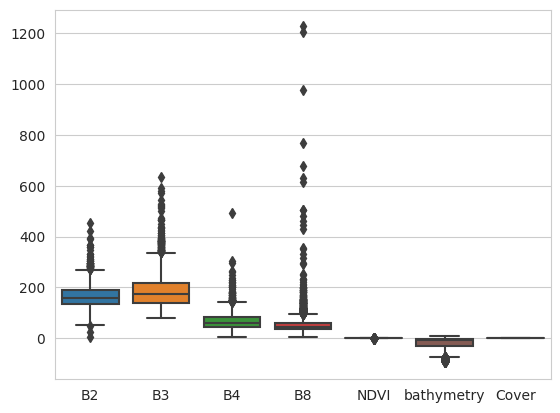

In [ ]:
sns.boxplot(data)
# Why these values: https://developers.google.com/earth-engine/datasets/catalog/COPERNICUS_S2_SR_HARMONIZED?hl=en. Accessed 03.04.2023

<Axes: >

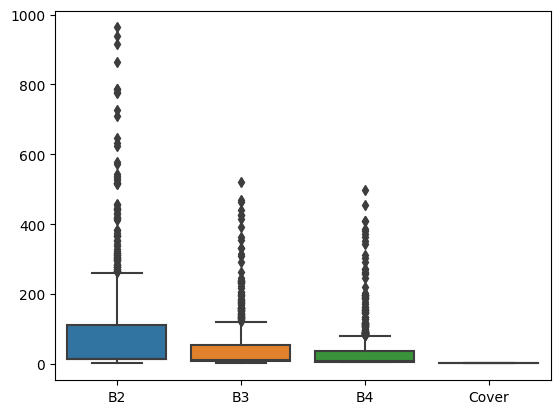

In [ ]:
sns.boxplot(data3_ndup)

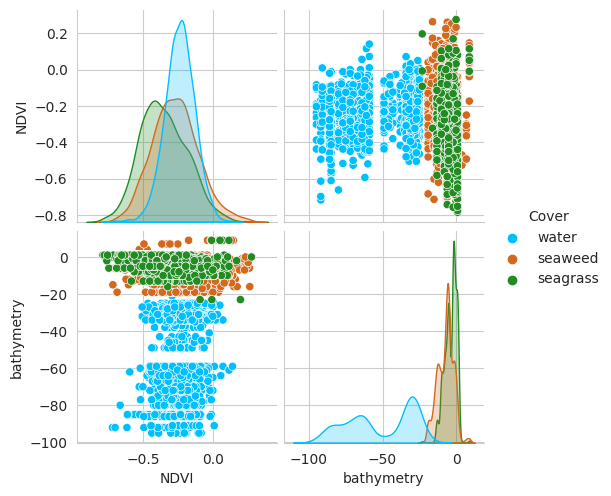

In [ ]:
pairplot_small(data)

# OBIA continued


In [ ]:
vis_params_sw = {'color':'#7b3e00'}
vis_params_sg = {'color':'1c5f2c'} 
vis_params_water = {'color':'#0d98ba'}  

Map.addLayer(sample_sg, vis_params_sg, 'seagrass samples')
Map.addLayer(sample_sw, vis_params_sw, 'seaweed samples')
Map.addLayer(sample_water, vis_params_water, 'water samples')
Map

Map(bottom=24205.399963378906, center=[43.70203416790044, -70.48773223534226], controls=(WidgetControl(options…

In [ ]:
# Locally store dat a
# 1) data = data_composite_min_11_test 
# 2) data.head()               # Check how the data looks 
# 3) data.describe()
# 4) data.isnull().sum().sum() # Check for null-values 
# 5) data.columns              # Found mix-up mistake of columns
# 6) data = data.drop(['geometry','B2', 'B3','B4','B8', 'NDVI', 'bathymetry'], axis=1) # Remove duplicates created 
# 7) data = data.drop(['geometry'], axis=1)
# 8) data.rename(columns={'B2_mean': 'B2', 'B3_mean': 'B3', 'B4_mean':'B4', 'B8_mean':'B8','NDVI_mean':'NDVI', 'bathymetry_mean': 'bathymetry'}, inplace=True)
# 9) data.head()                # Verify that our fix worked
# 10) data = data.sample(frac=1) # Randomize the data
# 11) data.to_csv(r'/content/OBIA11test.csv', index=False) 

In [ ]:
print(len(data))
print(data['Cover'].value_counts())
data.aggregate(['min','max','mean','median'])

4164
1    1388
2    1388
3    1388
Name: Cover, dtype: int64


B2          B3          B4           B8      NDVI  bathymetry  \
min      11.445064   72.611548    7.959170     4.000000 -0.887324   -95.00000   
max     414.216802  580.094922  508.628516  1204.000000  0.275949     9.00000   
mean    157.683654  176.932218   65.909692    53.607829 -0.288229   -20.99976   
median  155.026305  166.274654   61.596720    45.000000 -0.283951    -8.00000   

        Cover  
min       1.0  
max       3.0  
mean      2.0  
median    2.0

In [ ]:
data.head()

geometry          B2          B3         B4  B8  \
2127  POINT (-69.84626 43.74277)  107.487388  185.113466  57.134909  50   
2163  POINT (-70.12650 43.71369)   62.087794  127.566923  17.486048  96   
1729  POINT (-69.70015 43.87059)  210.095864  305.280065  88.270159  25   
2361  POINT (-70.11682 43.71576)  141.756813  208.260089  63.621469  34   
542   POINT (-69.07918 43.41019)   89.547932   90.640032  13.135080  13   

          NDVI  bathymetry  Cover  
2127 -0.212598          -1      3  
2163  0.263158          -9      3  
1729 -0.593496          -8      2  
2361 -0.387387          -6      3  
542  -0.161290        -156      1

In [ ]:
'''
Code for testing differnt sizes of numPixels.

# for i in [10, 30, 100, 200, 5000]:
# for i in [100, 110, 130, 150]:
# for i in [100000, 50000, 70000, 200000]:

sample_sg = objectPropertiesImage.sample(**{
'region': seaweed_shp,
'numPixels':110,  
'geometries': True,
'seed' :3,
'scale': 10,   # Set to 10 as our resolution is 10-meters
})

print(sample_sg.size().getInfo())
'''

39


# Cut ee.Image into 5 regions for test and validation later on

In [ ]:
# Create 6 feautres
features = geemap.fishnet(roi, rows = 2, cols = 3, delta = 0)
Map.addLayer(features, {}, 'grid')
print('Number of features from grid: ', features.size().getInfo())
feature_list = features.toList(6)
print(feature_list.getInfo())
Map

Number of features from grid:  6
[{'type': 'Feature', 'geometry': {'geodesic': False, 'type': 'Polygon', 'coordinates': [[[-70.248302, 43.27020599999997], [-69.79333466666667, 43.27020599999997], [-69.79333466666667, 43.758423257434075], [-70.248302, 43.758423257434075], [-70.248302, 43.27020599999997]]]}, 'id': '0_0', 'properties': {'east': -69.79333466666667, 'north': 43.758423257434075, 'south': 43.27020599999997, 'west': -70.248302}}, {'type': 'Feature', 'geometry': {'geodesic': False, 'type': 'Polygon', 'coordinates': [[[-69.79333466666667, 43.27020599999997], [-69.33836733333334, 43.27020599999997], [-69.33836733333334, 43.758423257434075], [-69.79333466666667, 43.758423257434075], [-69.79333466666667, 43.27020599999997]]]}, 'id': '0_1', 'properties': {'east': -69.33836733333334, 'north': 43.758423257434075, 'south': 43.27020599999997, 'west': -69.79333466666667}}, {'type': 'Feature', 'geometry': {'geodesic': False, 'type': 'Polygon', 'coordinates': [[[-69.33836733333332, 43.2702

Map(bottom=48060.59999084473, center=[43.80162935726774, -69.6166774407069], controls=(WidgetControl(options=[…

In [ ]:
# Extract metadata on the second feautre from our feautre list
f2_meta = feature_list.getInfo()[1]

# Get coordinates from the second feature
f2 = feature_list.getInfo()[1]['geometry']['coordinates'][0]

# Create geometry from cooridnates of second feature
# Source code:. https://developers.google.com/earth-engine/guides/geometries Accessed: 02.03.2023
f2_geometry = ee.Geometry.Polygon(f2)
type(f2_geometry)

In [ ]:
# Collect all the geometries from the grid created above and store them in a list. 
meta = []
img_list = []

for feat in range(1,features.size().getInfo(),1):
  f_coord = feature_list.getInfo()[feat]['geometry']['coordinates'][0]
  f_geometry = ee.Geometry.Polygon(f_coord)
  meta.append(f_geometry)
  img = image.clip(f_geometry)
  img_list.append(img)

  len(img_list)

In [ ]:
#Create an ImageCollection from the FeatureCollection
images = features.map(lambda feature: ee.Image(ee.Number(feature.get('foo'))))
type(images)

In [ ]:
collectionFromConstructor = ee.ImageCollection(img_list)
type(collectionFromConstructor)

ee.imagecollection.ImageCollection

In [ ]:
# Code inspired from Open AI

third_image =  ee.Image(collectionFromConstructor.toList(collectionFromConstructor.size()).get(3))
second_image = ee.Image(collectionFromConstructor.toList(collectionFromConstructor.size()).get(1))


In [ ]:
# Display geometry of second feature
# source code: https://developers.google.com/earth-engine/guides/feature_collection_info. Accessed: 02.03.2023

vis_params = {"bands": [ 'B2', 'B3', 'B4'], "min": 0, "max": 1500, "gamma": 1.5}
Map.addLayer(third_image, vis_params, 'feature 1')
# print('First watershed', sheds.first());
Map

Map(bottom=48061.0, center=[43.80162935726774, -69.6166774407069], controls=(WidgetControl(options=['position'…

# Create dataset of equal number of training samples and dataset with only 3 best features


In [ ]:
'''

# Load datasets 

# Data with 11 feautres 
obia_train = pd.read_csv('/content/OBIA_train11.csv')
obia_test=  pd.read_csv('/content/OBIA11test.csv')

# Data with 7 feautres 
pb6_train = pd.read_csv('/content/PB_train6.csv')
pb6_test = pd.read_csv('/content/PB6test.csv')

# Data with 3 feautres 
pb3_train = pb6_train.loc[:,['B2','B3','B4','Cover']]
pb3_test = pb6_test.loc[:,['B2','B3','B4','Cover']]

print(f'length of pixel-based datasets for training:{len(pb6_train)}')
print(f'length of pixel-based datasets for testing:{len(pb6_test)}')
print(f'length of object-based datasets for training:{len(obia_train)}')
print(f'length of object-based datasets for testing:{len(obia_test)}')

# Randomize the order of the data 
pb6_train = pb6_train.sample(frac=1, ignore_index=True)     # Randomly shuffle data 
pb6_train_small = pb6_train.iloc[:len(obia_train)]

# Dataset 1
pb3_train_small =  pb6_train_small.loc[:,['B2','B3','B4','Cover']]

# Dataset 4
pb_best_train = pb6_train_small.loc[:,['B3','B8','bathymetry','Cover']]
pb_best_test = pb6_test.loc[:,['B3','B8','bathymetry','Cover']]

# Dataset 5
obia_best_train = obia_train.loc[:,['B8','NDVI','bathymetry', 'area','Cover']]
obia_best_test = obia_test.loc[:,['B8','NDVI','bathymetry', 'area','Cover']]

print('All training dataset are of equa length = ', len(obia_best_train)==len(pb_best_train) == len(pb3_train_small))
print('Number of training samples:',len(obia_best_train))

# Checking if the dataset is balanced 
pb6_train_small.Cover.value_counts()

# Store training and test data locally for reproducability
# train
pb3_train_small.to_csv('/content/dataset1.csv', index=False)
pb6_train_small.to_csv('/content/dataset2.csv', index=False)
obia_train.to_csv('/content/dataset3.csv', index=False) 
pb_best_train.to_csv('/content/dataset4.csv', index=False) 
obia_best_train.to_csv('/content/dataset5.csv', index=False)

# test
pb3_test.to_csv('/content/test1.csv', index=False)
pb6_test.to_csv('/content/test2.csv', index=False)
obia_test.to_csv('/content/test3.csv', index=False)
pb_best_test.to_csv('/content/test4.csv', index=False)
obia_best_test.to_csv('/content/test5.csv', index=False)

'''

All training dataset are of equa length =  True
Number of training samples: 738


# Retrieve locally stored data

In [ ]:
train1 = pd.read_csv('/content/dataset1.csv')
train2 =  pd.read_csv('/content/dataset2.csv')
train3 = pd.read_csv('/content/dataset3.csv')
train4 =  pd.read_csv('/content/dataset4.csv')
train5 = pd.read_csv('/content/dataset5.csv')

test1 =  pd.read_csv('/content/test1.csv')
test2 =  pd.read_csv('/content/test2.csv')
test3 =  pd.read_csv('/content/test3.csv')
test4 =  pd.read_csv('/content/test4.csv')
test5 =  pd.read_csv('/content/test5.csv')

In [ ]:
train5.Cover.unique()

array([1, 3, 2])

In [ ]:
# NB1: observe that the values do not present wavlengths, put DN-values

# NB2: There are 720 samples of training data
# train1['Cover'].count()

# NB3: Observe that the integers representing the classes are not stored in chronological order...
# train1.Cover.unique() --> array([2, 1, 3])  = array(['seaweed', 'water', 'seagrass']) (This accounts for all PB-derived datsets)
# While the GEOBIA-derived datasets has results in --> array([1, 3, 2]) = array(['water', 'seagrass', 'seaweed'])

# NB4: The training data is balanced with ~240 samples for each class
# train1['Cover'].value_counts()

# NB5: Observe that the test data has negative values, indicating effect of sun-glint. 
# This could be improved by re-applying sun-glint correction and resample, or by removing values manually from the pandas df. 
# test1.aggregate(['min','max','mean','median'])

# Visualization of raw data 


In [ ]:
train3.iloc[:,-1].replace([1,2,3], ['water','seaweed','seagrass'], inplace=True)
train3.head()

B2          B3          B4          B8      NDVI           area  \
0   12.124972    6.152216    4.841733    4.536298 -0.608847   78542.734375   
1   12.751205    8.429532    6.886879    5.985725 -0.587517  898464.625000   
2  310.981720  382.838623  463.150146  688.335815  0.012179   20180.642578   
3   13.633481    9.480711    7.263058    7.786502 -0.324886  225692.234375   
4   16.298777   13.743753    9.256524   15.451407 -0.833239  215768.625000   

   bathymetry    clusters    height  perimeter     width     Cover  
0 -152.421432  -555143296  0.004941        416  0.004222     water  
1 -163.301193  -823210496  0.014912       2043  0.016349     water  
2   -3.000000  -136047600  0.003144         68  0.001168  seagrass  
3  -10.922240   167464896  0.005929        772  0.009522   seaweed  
4  -21.996683  1505098368  0.008714        413  0.006737   seaweed

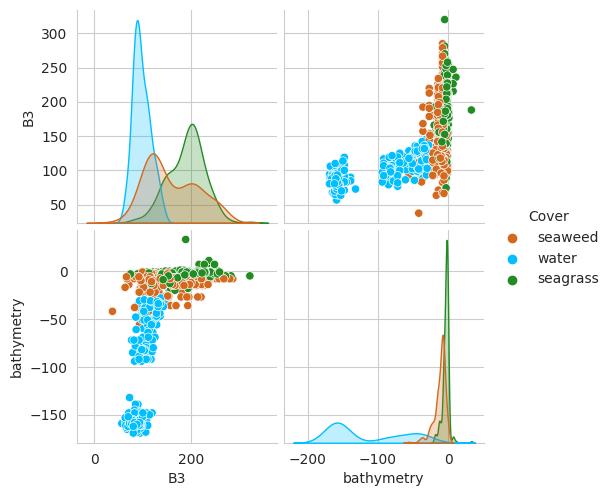

In [ ]:
# Set figure size (width, height) in inches
sns.pairplot(train2.iloc[:,[1,5,-1]], hue='Cover', palette = ['chocolate','deepskyblue', 'forestgreen'])

# ordering of palette values matter as the train1,train2, train4 sets store the labels in order: 'seaweed', 'water', 'seagrass'
# For train 3 and 5 stores lables in order 'water', 'seagrass', and 'seaweed'

# Data visualization: Statistical testing of data 
- Check for normal distribution

Seems like my training data is not noramlly distributed, while the training data is

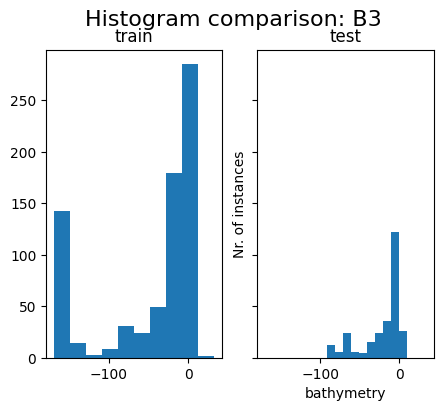

In [ ]:
fig, [ax1, ax2] = plt.subplots(
    nrows=1, ncols=2, figsize = (5,4), sharex = True, sharey= True)
fig.suptitle(f'Histogram comparison: B3', fontsize=16)
plt.xlabel('bathymetry')
plt.ylabel('Nr. of instances')
ax1.set_title(f"train", fontdict={"fontsize": 12})
ax1.hist(pb6_train_small['bathymetry'])
ax2.set_title(f"test", fontdict={"fontsize": 12})
ax2.hist(pb6_test['bathymetry'])
plt.show()

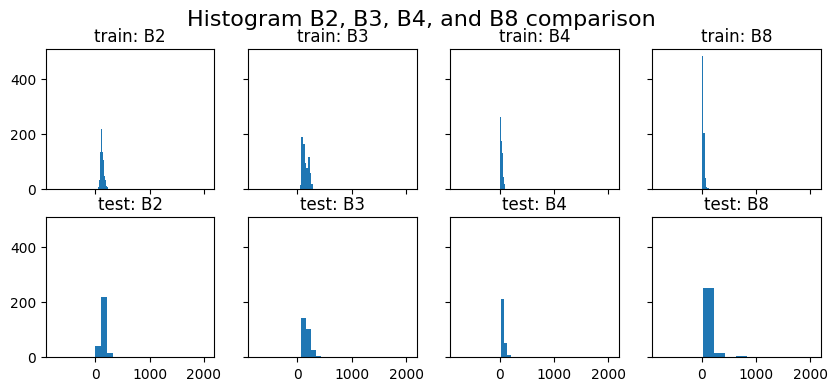

In [ ]:
fig, axs = plt.subplots(
    nrows=2, ncols=4, figsize = (10,4), sharex = True, sharey= True)
fig.suptitle(f'Histogram B2, B3, B4, and B8 comparison', fontsize=16)
axs[0,0].set_title(f"train: B2", fontdict={"fontsize": 12})
axs[0,0].hist(pb6_train_small['B2'])
axs[0,1].set_title(f"train: B3", fontdict={"fontsize": 12})
axs[0,1].hist(pb6_train_small['B3'])
axs[0,2].set_title(f"train: B4", fontdict={"fontsize": 12})
axs[0,2].hist(pb6_train_small['B4'])
axs[0,3].set_title(f"train: B8", fontdict={"fontsize": 12})
axs[0,3].hist(pb6_train_small['B8'])


axs[1,0].set_title(f"test: B2", fontdict={"fontsize": 12})
axs[1,0].hist(pb6_test['B2'])
axs[1,1].set_title(f"test: B3", fontdict={"fontsize": 12})
axs[1,1].hist(pb6_test['B3'])
axs[1,2].set_title(f"test: B4", fontdict={"fontsize": 12})
axs[1,2].hist(pb6_test['B4'])
axs[1,3].set_title(f"test: B8", fontdict={"fontsize": 12})
axs[1,3].hist(pb6_test['B8'])
plt.show()

In [ ]:
fig = sm.qqplot(obia_train['B4'], line='s')

In [ ]:
obia_train.columns

Index(['B2', 'B3', 'B4', 'B8', 'NDVI', 'area', 'bathymetry', 'clusters',
       'height', 'perimeter', 'width', 'Cover'],
      dtype='object')

Text(0.5, 1.0, 'test: B2')

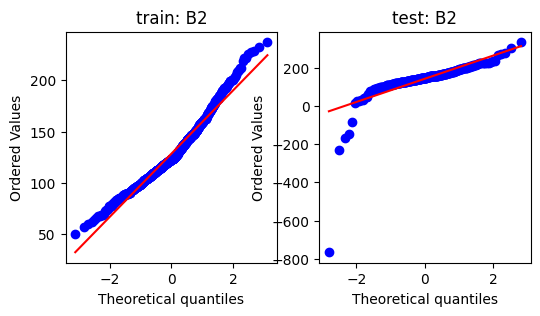

In [ ]:
plt.figure(figsize=(6,3))
fig.suptitle(f'QQ-plots OBIA training comparison', fontsize=16)
ax = plt.subplot(1,2,1)
res1 = stats.probplot(pb6_train_small['B2'], dist="norm", plot=ax)
ax.set_title('train: B2')

# Q-Q plot
ax1 = plt.subplot(1,2,2)
res = stats.probplot(pb6_test['B2'], dist="norm", plot=ax1)
# Divide by 1000 because : https://developers.google.com/earth-engine/datasets/catalog/COPERNICUS_S2_SR_HARMONIZED. Accessed 04.04.23
ax1.set_title('test: B2')
# For details see: https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.probplot.html


In [ ]:
#perform Shapiro-Wilk test for normality
alpha = 0.05 # We say a features does not come from a normal distribution if the p-value is < 0.05 (5%)

for feature in pb6_train_small.columns:
  shapiro_test =  shapiro(pb6_train_small[feature])
  pval = shapiro_test.pvalue
  print(f'shapiro_results for obia training features {feature}: {shapiro_test}')
  if pval < alpha:
    print(f'feature {feature} does not come from a normal distribution')
  else: 
    print(f'feature {feature} does come from a normal distribution. Hurray!')

shapiro_results for obia training features B2: ShapiroResult(statistic=0.9714797735214233, pvalue=8.282406011028698e-11)
feature B2 does not come from a normal distribution
shapiro_results for obia training features B3: ShapiroResult(statistic=0.9389561414718628, pvalue=7.855017608133388e-17)
feature B3 does not come from a normal distribution
shapiro_results for obia training features B4: ShapiroResult(statistic=0.9261747598648071, pvalue=1.4431219407292807e-18)
feature B4 does not come from a normal distribution
shapiro_results for obia training features B8: ShapiroResult(statistic=0.805313229560852, pvalue=7.258229912847194e-29)
feature B8 does not come from a normal distribution
shapiro_results for obia training features NDVI: ShapiroResult(statistic=0.9681330919265747, pvalue=1.3549835732595827e-11)
feature NDVI does not come from a normal distribution
shapiro_results for obia training features bathymetry: ShapiroResult(statistic=0.7113377451896667, pvalue=9.694109056689473e-34)
f

# Spectral signature for each class

In [ ]:
def spectral_reflectance(data):
  dataframe = pd.DataFrame(columns = list(data.columns))
  water = pd.DataFrame(columns = list(data.columns))
  seagrass = pd.DataFrame(columns = list(data.columns))
  seaweed = pd.DataFrame(columns = list(data.columns))

  for i in range(0, len(data['Cover']), 1):
    if data['Cover'][i] == 1 or data['Cover'][i] == 'water'  :  
      water.loc[str(i)] = list(data.loc[i])
    elif data['Cover'][i] == 2 or data['Cover'][i] == 'seaweed': 
      seaweed.loc[str(i)] = list(data.loc[i])
    else:
      seagrass.loc[str(i)] = list(data.loc[i])


  spec_signature_water = []
  spec_signature_seaweed = []
  spec_signature_seagrass = []


  for band in water.columns[:-1]:
    b = water[band].mean()
    spec_signature_water.append(b)

  for band in seaweed.columns[:-1]:
    b = seaweed[band].mean()
    spec_signature_seaweed.append(b)


  for band in seagrass.columns[:-1]:
    b =seagrass[band].mean()
    spec_signature_seagrass.append(b)

  labels = list(data.columns[:-1])

  plt.plot(labels, spec_signature_water, label='water')
  plt.plot(labels, spec_signature_seaweed, label='seaweed')
  plt.plot(labels, spec_signature_seagrass, label='seagrass')


  plt.title('Spectral Signatures: Casco Bay', fontsize = 15)
  plt.xlabel('Bands', fontsize = 12)
  plt.ylabel('Average DN-values', fontsize = 12)
  plt.legend()
  return plt.show()


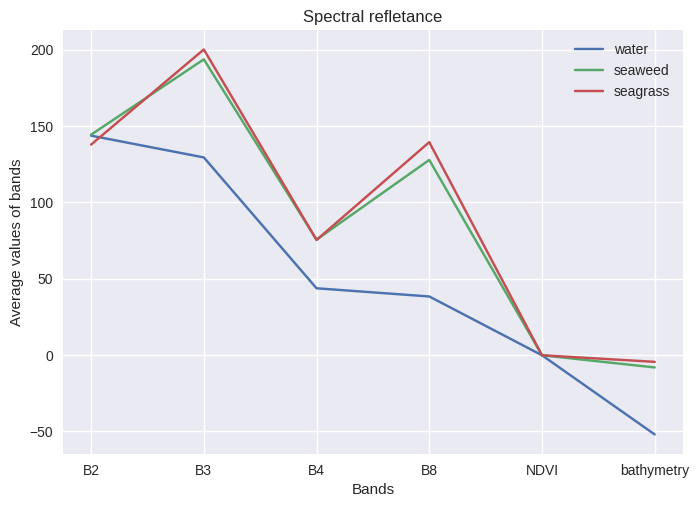

In [ ]:
spectral_reflectance(pb6_test) # New test data only for PB

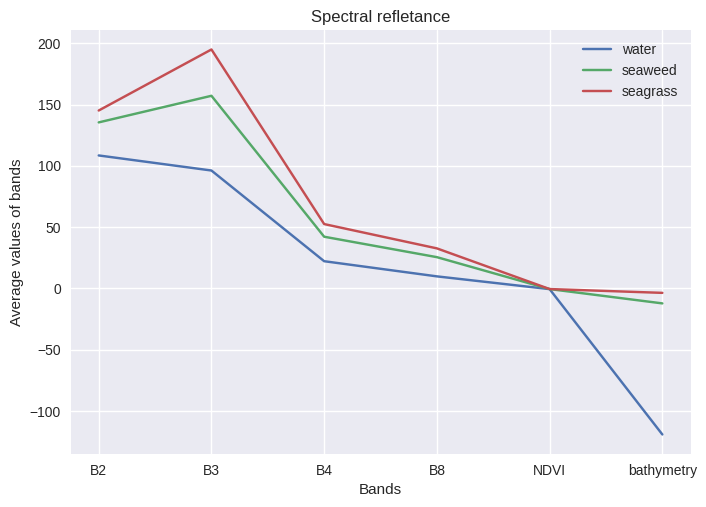

In [ ]:
spectral_reflectance(pb6_train) # New test data only for PB

In [ ]:
train2.columns

Index(['B2', 'B3', 'B4', 'B8', 'NDVI', 'bathymetry', 'Cover'], dtype='object')

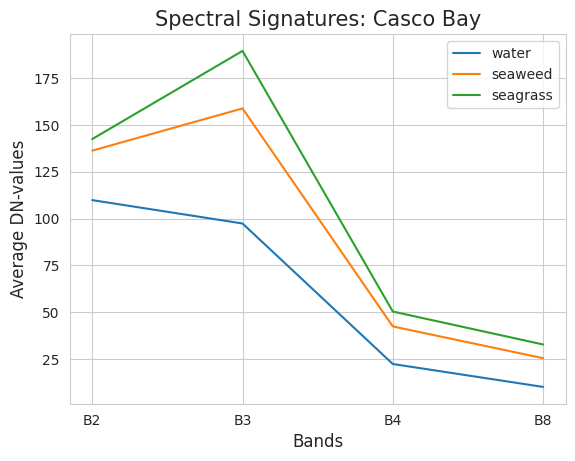

In [ ]:
spectral_reflectance(train2.iloc[:,[0,1,2,3,-1]]) # New test data only for PB

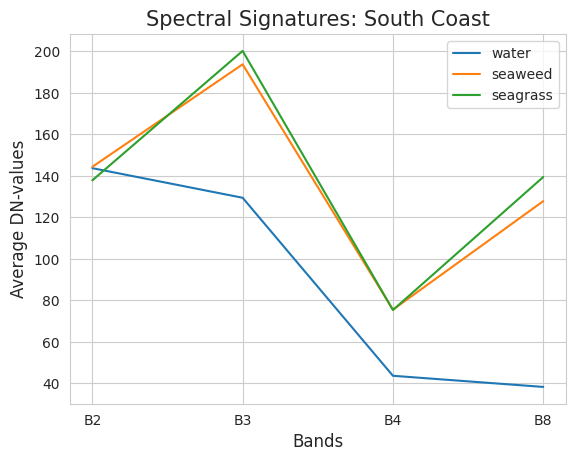

In [ ]:
spectral_reflectance(test2.iloc[:,[0,1,2,3,-1]]) # New test data only for PB

# Bias-variance trade-off graph

In [ ]:
def train_val(data):
  y = data.iloc[:,-1]            # Get class lables
  label = y.name                 # Get the name of class label
  X = data.drop(label, axis = 1) # Get only feaures 

  # Standardize the data 
  X_std = X #StandardScaler().fit_transform(X)
  # Training dataset set to 80 %
  X_train, X_rem, y_train, y_rem = train_test_split(X_std, y, train_size=0.8, random_state=42)
  # Validation and test dataset set to 10% each
  X_valid, X_test, y_valid, y_test = train_test_split(X_rem, y_rem, test_size=0.5, random_state=42)

  # Initializing the estimator
  rfc=RandomForestClassifier(random_state=42)

  param_grid = {'n_estimators':[int(x) for x in np.linspace(start=10, stop = 30, num = 5)],
              'max_features': ['sqrt', 'log2', None],
              'max_depth':[2,4,10],
              'min_samples_split': [2,5],
              'min_samples_leaf':[1,2],
              'bootstrap':[True, False],
              }

  CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, scoring='accuracy', cv= 5, refit=True)
  CV_rfc.fit(X, y)
  train_sizes, train_scores, test_scores = learning_curve(estimator = CV_rfc.best_estimator_,
                                                          X=X_train,
                                                          y=y_train,
                                                          train_sizes=np.linspace(0.03,1,5),
                                                          cv=10,
                                                          n_jobs=-1)

  train_mean = np.mean(train_scores,axis=1)
  train_std = np.std(train_scores,axis=1)
  test_mean = np.mean(test_scores,axis=1)
  test_std = np.std(test_scores,axis=1)

  f = plt.figure()
  f.set_figwidth(6)
  f.set_figheight(6)
    
  plt.plot(train_sizes, train_mean,
          color='blue', marker='o',
          markersize=5, label='Training accuracy')

  plt.fill_between(train_sizes,
                  train_mean + train_std,
                  train_mean - train_std,
                  alpha=0.15, color='blue')

  plt.plot(train_sizes, test_mean,
          color='green', linestyle='--', marker='s',
          markersize=5, label='Validation accuracy')

  plt.fill_between(train_sizes,
                  test_mean + test_std,
                  test_mean - test_std,
                  alpha=0.15, color='green')
  
  plt.xlabel('Number of training examples', fontsize = 15)
  plt.ylabel('Accuracy', fontsize = 15 )
  plt.xticks(fontsize = 15)
  plt.yticks(fontsize = 15)
  plt.legend(loc='lower right', prop={'size': 15})
  plt.ylim([0.0,1.03])
  plt.title('Learning curve: number of training examples', fontsize = 20)
  plt.grid()
  plt.tight_layout()
  return plt.show()


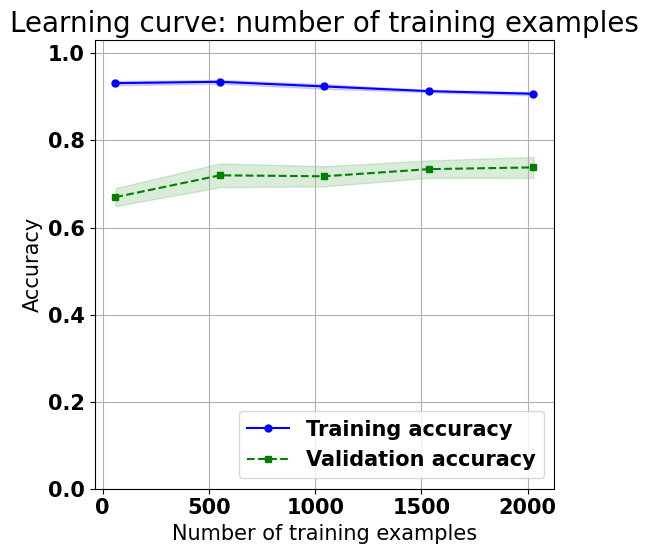

In [ ]:
train_val(pb3_train) # with minmaxscalar


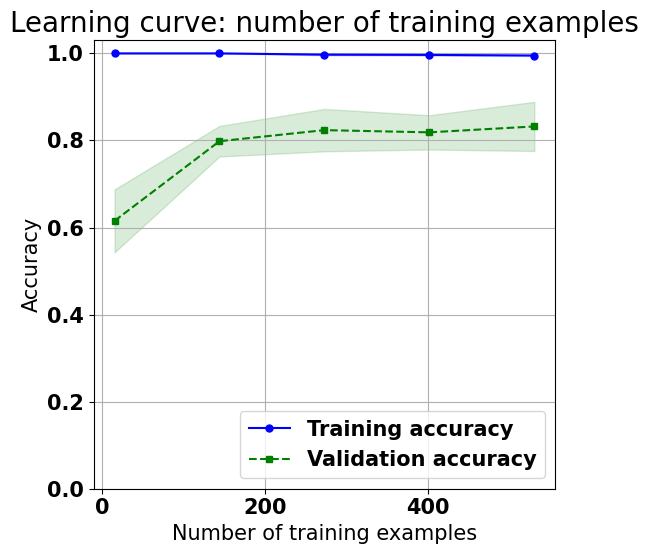

In [ ]:
train_val(obia_train) # with standardscalar


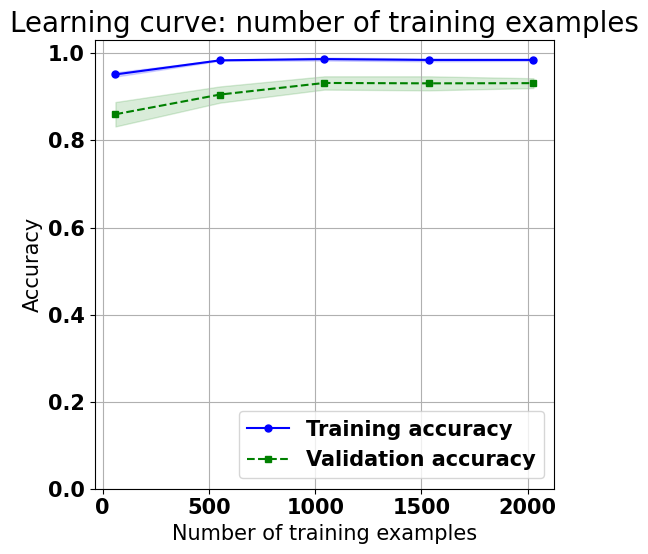

In [ ]:
train_val(pb6_train) # with standardscalar


# Validation curve 



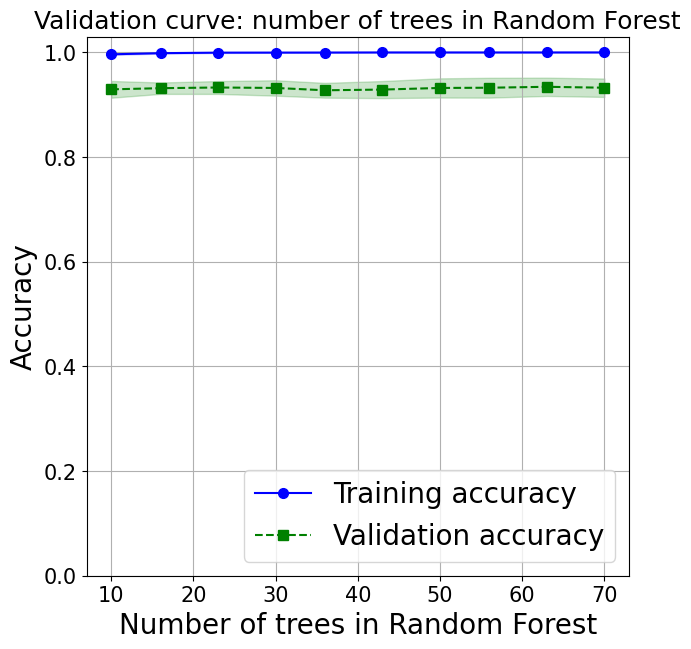

In [ ]:
def val_curve(data):
  y = data.iloc[:,-1]            # Get class lables
  label = y.name                 # Get the name of class label
  X = data.drop(label, axis = 1) # Get only feaures 

  # Standardize the data 
  X_std = X #StandardScaler().fit_transform(X)
  # Training dataset set to 80 %
  X_train, X_rem, y_train, y_rem = train_test_split(X_std, y, train_size=0.8, random_state=42)
  # Validation and test dataset set to 10% each
  X_valid, X_test, y_valid, y_test = train_test_split(X_rem, y_rem, test_size=0.5, random_state=42)

  # Initializing the estimator
  rfc=RandomForestClassifier(random_state=42)

  #Number of trees in RF
  n_estimators = [int(x) for x in np.linspace(start=10, stop = 70, num = 10)]

  train_scores, test_scores = validation_curve(estimator = rfc,
                                            X=X_train,
                                            y=y_train,
                                            param_name='n_estimators',
                                            param_range=n_estimators,
                                            cv=10)

  train_mean = np.mean(train_scores,axis=1)
  train_std = np.std(train_scores,axis=1)
  test_mean = np.mean(test_scores,axis=1)
  test_std = np.std(test_scores,axis=1)

  f = plt.figure()
  f.set_figwidth(7)
  f.set_figheight(7)

  plt.plot(n_estimators, train_mean,
          color='blue', marker='o',
          markersize=7, label='Training accuracy')

  plt.fill_between(n_estimators,
                  train_mean + train_std,
                  train_mean - train_std,
                  alpha=0.20, color='blue')

  plt.plot(n_estimators, test_mean,
          color='green', linestyle='--', marker='s',
          markersize=7, label='Validation accuracy')

  plt.fill_between(n_estimators,
                  test_mean + test_std,
                  test_mean - test_std,
                  alpha=0.20, color='green')

  plt.grid()
  plt.xlabel('Number of trees in Random Forest',  fontsize = 20)
  plt.ylabel('Accuracy',  fontsize = 20)
  plt.xticks(fontsize = 15)
  plt.yticks(fontsize = 15)
  plt.legend(loc='lower right', prop={'size': 20})
  plt.ylim([0.0,1.03])
  plt.title('Validation curve: number of trees in Random Forest', fontsize = 18)
  return plt.show()

val_curve(pb6_train)

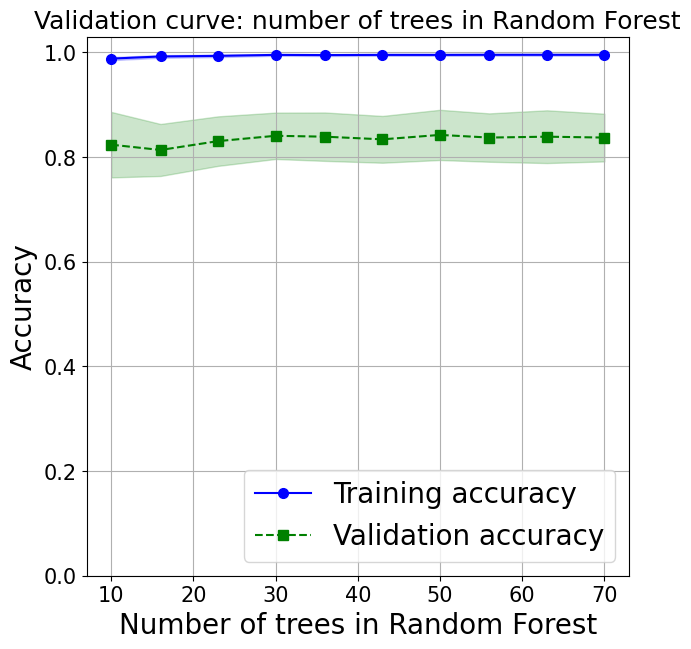

In [ ]:
val_curve(obia_train)

# SML: Random Forest Training data 

In [ ]:
def supervised_RF(data):
  '''
  Takes any dataset with X feautres and a column of y-values in.
  Assumption 1: the last column contains the class-labels
  Assumption 2: Data is shuffled
  '''
  y = data.iloc[:,-1]            # Get class lables
  label = y.name                 # Get the name of class label
  X = data.drop(label, axis = 1) # Get only feaures 

  # Training dataset set to 80 %, validation set to 20%
  X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, random_state=42)

  # Initiate estimator
  rfc=RandomForestClassifier(random_state=42)

  # Initiate search space for grid search algorithm
  param_grid = {'n_estimators':[int(x) for x in np.linspace(start=10, stop = 30, num = 5)], # List comprehension
              'max_features': ['sqrt', 'log2', None],
              'max_depth':[2,4,10],
              'min_samples_split': [2,5],
              'min_samples_leaf':[1,2],
              'bootstrap':[True, False],
              }

  # Grid search algorithm
  CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 10, refit=True)
  # Training 
  CV_rfc.fit(X_train, y_train)

  # Calculates the SHAP values - It takes some time
  explainer = shap.Explainer(CV_rfc.predict, X_valid)
  shap_values = explainer(X_valid)

  # Predicting on independent validation set
  preds = CV_rfc.predict(X_valid)

  # Training accuracies during CV
  mean_test_score_3f = CV_rfc.cv_results_['mean_test_score']
  # return overall accuracy , lenght of data , predicted values, true values, training accuracies, explaining features
  return accuracy_score(y_valid, preds), len(X.columns), preds, y_valid, mean_test_score_3f, shap_values


# Validation accuracies with SML: Casco Bay

In [ ]:
# Running results of dataset of same size:
print('----------- SML classification of validation data -----------')
training = [train1, train2, train3, train4, train5]
datanr = [1,2,3,4,5]

for train, nr in zip(training,datanr):
  start = time.time()
  results = supervised_RF(train)
  print(f'OA = {results[0]*100:,.2f}%  for dataset {nr}, execution time = {(time.time() - start)/60:,.2f} minutes')
  print('-----------------------------------------------------------------')

----------- SML classification of validation data -----------
OA = 66.89%  for dataset 1, execution time = 2.84 minutes
-----------------------------------------------------------------
OA = 87.16%  for dataset 2, execution time = 2.79 minutes
-----------------------------------------------------------------


Permutation explainer: 149it [01:00,  1.80it/s]


OA = 85.81%  for dataset 3, execution time = 4.96 minutes
-----------------------------------------------------------------
OA = 90.54%  for dataset 4, execution time = 2.51 minutes
-----------------------------------------------------------------
OA = 81.08%  for dataset 5, execution time = 2.64 minutes
-----------------------------------------------------------------


## SHAP-values for SML validation data: Casco Bay

In [ ]:
# Storing results for the individual datasets, for later use 
results1 = supervised_RF(train1)
results2 = supervised_RF(train2)
results3 = supervised_RF(train3)
results4 = supervised_RF(train4)
results5 = supervised_RF(train5)

Permutation explainer: 149it [00:57,  2.04it/s]


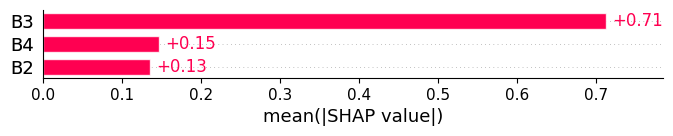

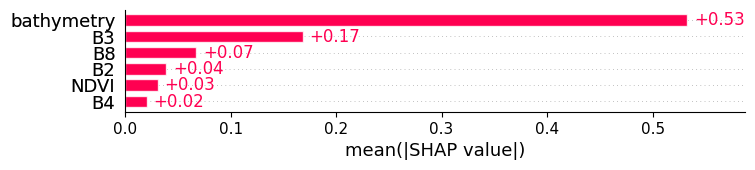

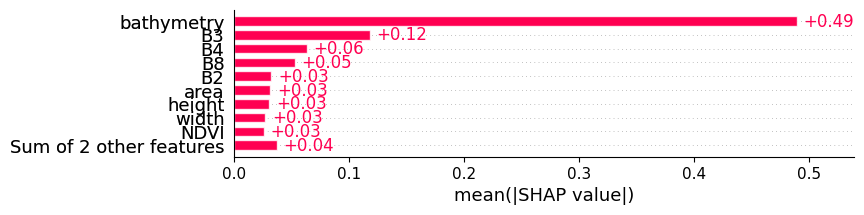

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(8,8))
plt.subplot(3,1,1)
shap.plots.bar(results1[5])
plt.subplot(3,1,2)
shap.plots.bar(results2[5])
plt.subplot(3,1,3)
shap.plots.bar(results3[5])
plt.tight_layout()
plt.show()

In [ ]:
# Classification report all datasets wit SML: Casco Bay
results = [results1, results2, results3, results4, results5]
data_nr = [1,2,3,4,5]
for r, nr in zip(results, data_nr):
  names=['water', 'seaweed', 'seagrass']
  
  print(f'           SML, Dataset {nr}, Casco Bay: precision and recall \n' )
  print(classification_report(r[3],r[2], target_names=names))
  print('-----------------------------------------------------------------')

           SML, Dataset 1, Casco Bay: precision and recall 

              precision    recall  f1-score   support

       water       0.74      0.88      0.80        60
     seaweed       0.61      0.36      0.45        53
    seagrass       0.60      0.77      0.68        35

    accuracy                           0.67       148
   macro avg       0.65      0.67      0.64       148
weighted avg       0.66      0.67      0.65       148

-----------------------------------------------------------------
           SML, Dataset 2, Casco Bay: precision and recall 

              precision    recall  f1-score   support

       water       0.97      0.98      0.98        60
     seaweed       0.87      0.77      0.82        53
    seagrass       0.72      0.83      0.77        35

    accuracy                           0.87       148
   macro avg       0.85      0.86      0.86       148
weighted avg       0.88      0.87      0.87       148

--------------------------------------------------

# Tau and variance metrics for SML: Casco Bay

In [ ]:
tau_list = [tau(results1[0]), tau(results2[0]), tau(results3[0]), tau(results4[0]), tau(results5[0])]

# Variance
var1 = variance(train1, results1[0])
var2 = variance(train2, results2[0])
var3 = variance(train3, results3[0])
var4 = variance(train4, results4[0])
var5 = variance(train5, results5[0])

var_list = [var1, var2, var3, var4, var5]

# Dataset numbers
feat_list = [1,2,3,4,5]
print('      Casco Bay : SML')
print(' --------------------------')
print('|Dataset | Tau  | Variance |')
print(' --------------------------')
for i, t, var in zip(feat_list, tau_list, var_list):
  print(f'| {i}      |{t:.3f} |    {var:.3f} |')
print(' --------------------------')

# Calculating z-statistics
#print('''At a 95% significance level, Z = 1.96. 
#Thus, values > Z tells us that there is a significant difference between the two methods. \n''')

#def z_stat(tauA, tauB, varA, varB):
#  return (tauA-tauB)/(sqrt(varA**2 - varB**2))

#print('z-statistics for SML accuracy results in Casco Bay')

#6vs3 = z_stat(tau(results3[0]), tau(results_pb_best_train[0]),var3, varPBbest )
#print(f'Z-value between dataset 1 and 4: {z6vs3:,.2f} ')
#print('------------------------------------------------------')
#z6vs11 = z_stat(tau(results_pb_best_train[0]), tau(results3[0]), varPBbest, var3 )
#print(f'Z-value between dataset 2 and 3: {z6vs11:,.2f} ')
#print('------------------------------------------------------')
#z11vs3 = z_stat(tau(results11[0]), tau(results3[0]), var11, var3 )
#print(f'Z-value between dataset 1 and 3: {z11vs3:,.2f}')
#print('------------------------------------------------------')

#zpbvs6 = z_stat(tau(results6[0]), tau(results_pb_best_train[0]), varPBbest, var6 )
#print(f'Z-value between dataset 2 and 4: {zpbvs6:,.2f}')
#print('------------------------------------------------------')

#zobiavs11 = z_stat(tau(results11[0]), tau(results_obia_train[0]), var11, varOBIAbest )
#print(f'Z-value between dataset 3 and 5: {zobiavs11:,.2f}')
#print('------------------------------------------------------')



      Casco Bay : SML
 --------------------------
|Dataset | Tau  | Variance |
 --------------------------
| 1      |0.503 |    0.001 |
| 2      |0.807 |    0.000 |
| 3      |0.787 |    0.000 |
| 4      |0.858 |    0.000 |
| 5      |0.716 |    0.000 |
 --------------------------


# SML: Test data 

In [ ]:
def supervised_RF_test(data, data_test):
  '''
  Takes any dataset with X feautres and a column of y-values in.
  Function assumes the last column to contain the class-labels of the data
  '''
  y = data.iloc[:,-1]  # Get class lables
  label = y.name       # Get the name of class label
  X = data.drop(label, axis = 1) # Get only feaures 

  # Standardize the data 
  X_std =  StandardScaler().fit_transform(X)
  # Training dataset set to 80 %
  X_train, X_valid, y_train, y_valid = train_test_split(X_std, y, train_size=0.8, random_state=42)

  rfc=RandomForestClassifier(random_state=(3)) 

  param_grid = {'n_estimators':[int(x) for x in np.linspace(start=10, stop = 30, num = 5)],
              'max_features': ['sqrt', 'log2', None],
              'max_depth':[2,4,10],
              'min_samples_split': [2,5],
              'min_samples_leaf':[1,2],
              'bootstrap':[True, False],
              }

  CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 10, refit=True)
  CV_rfc.fit(X_train, y_train)

  y_test = data_test.iloc[:,-1]  # Get class lables
  label = y.name                 # Get the name of class label
  X_test = data_test.drop(label, axis = 1) # Get only feaures
  X_std_test = StandardScaler().fit_transform(X_test)

  preds = CV_rfc.predict(X_std_test)
  return  accuracy_score(y_test, preds), len(X.columns), preds, y_test

Usually, a standard scalar is not needed for the RF. However, seing a difference in using standard scalar when we predict the test set from South Coast is therefore intriging. This can be because we are using DN-values here instead of radiance. By standardizing the training and test data, the images become more comparable (?) given that the f1-score increases...  

In [ ]:
# Running results of dataset of same size:
print('----------- SML classification of validation data -----------')
training = [train1, train2, train3, train4, train5]
testing = [test1, test2, test3, test4, test5]
datanr = [1,2,3,4,5]

for train, test, nr in zip(training, testing, datanr):
  start = time.time()
  resultst = supervised_RF_test(train, test)
  print(f'OA = {resultst[0]*100:,.2f}%  for dataset {nr}, execution time = {(time.time() - start)/60:,.2f} minutes')
  print('-----------------------------------------------------------------')


# Storing results for the individual datasets, for later use 
results1t = supervised_RF_test(train1, test1)
results2t = supervised_RF_test(train2, test2)
results3t = supervised_RF_test(train3, test3)
results4t = supervised_RF_test(train4, test4)
results5t = supervised_RF_test(train5, test5)

----------- SML classification of validation data -----------
OA = 56.52%  for dataset 1, execution time = 2.78 minutes
-----------------------------------------------------------------
OA = 74.28%  for dataset 2, execution time = 2.83 minutes
-----------------------------------------------------------------
OA = 74.95%  for dataset 3, execution time = 3.81 minutes
-----------------------------------------------------------------
OA = 71.74%  for dataset 4, execution time = 2.11 minutes
-----------------------------------------------------------------
OA = 72.77%  for dataset 5, execution time = 2.41 minutes
-----------------------------------------------------------------


In [ ]:
# Storing results for the individual datasets, for later use 
results1t = supervised_RF_test(train1, test1)
results2t = supervised_RF_test(train2, test2)
results3t = supervised_RF_test(train3, test3)
results4t = supervised_RF_test(train4, test4)
results5t = supervised_RF_test(train5, test5)

In [ ]:
# Classification report all datasets wit SML: Casco Bay
results = [results1t, results2t, results3t, results4t, results5t]
data_nr = [1,2,3,4,5]
for r, nr in zip(results, data_nr):
  names=['water', 'seaweed', 'seagrass']
  
  print(f'           SML, Dataset {nr}, South Coast: precision and recall \n' )
  print(classification_report(r[3],r[2], target_names=names))
  print('-----------------------------------------------------------------')

           SML, Dataset 1, South Coast: precision and recall 

              precision    recall  f1-score   support

       water       0.79      0.79      0.79        92
     seaweed       0.37      0.26      0.31        92
    seagrass       0.50      0.64      0.56        92

    accuracy                           0.57       276
   macro avg       0.55      0.57      0.55       276
weighted avg       0.55      0.57      0.55       276

-----------------------------------------------------------------
           SML, Dataset 2, South Coast: precision and recall 

              precision    recall  f1-score   support

       water       0.93      1.00      0.96        92
     seaweed       0.64      0.54      0.59        92
    seagrass       0.64      0.68      0.66        92

    accuracy                           0.74       276
   macro avg       0.74      0.74      0.74       276
weighted avg       0.74      0.74      0.74       276

----------------------------------------------

# Tau and variance metrics for SML: South Coast

In [ ]:
tau_list = [tau(results1t[0]), tau(results2t[0]), tau(results3t[0]), tau(results4t[0]), tau(results5t[0])]

# Variance
var1t = variance(test1, results1[0])
var2t = variance(test2, results2[0])
var3t = variance(test3, results3[0])
var4t = variance(test4, results4[0])
var5t = variance(test5, results5[0])

var_list = [var1t, var2t, var3t, var4t, var5t]

# Dataset numbers
feat_list = [1,2,3,4,5]
print('      South Coast : SML')
print(' --------------------------')
print('|Dataset | Tau  | Variance |')
print(' --------------------------')
for i, t, var in zip(feat_list, tau_list, var_list):
  print(f'| {i}      |{t:.3f} |    {var:.3f} |')
print(' --------------------------')

'''
print('z-statistics for SML accuracy results at South Coast of Cape Elizabeth')
z6vs3t = z_stat(tau(results11t[0]), tau(results6t[0]), var11t, var6t)
print(f'Z-value between dataset 2 and 1: {z6vs3t:,.2f} ')
print('------------------------------------------------------')
z6vs11t = z_stat(tau(results6t[0]), tau(results11t[0]), var6t, var11t )
print(f'Z-value between dataset 2 and 3: {z6vs11t:,.2f} ')
#print('------------------------------------------------------')
#z11vs3t = z_stat(tau(results11t[0]), tau(results3t[0]), var11t, var3t )

print(f'Z-value between dataset 1 and 3: {z11vs3t:,.2f}')
print('------------------------------------------------------')

zpbvs6t = z_stat(tau(results6t[0]), tau(resultsPBt[0]), varPBbestt, var6t )
print(f'Z-value between dataset 2 and 4: {zpbvs6t:,.2f}')
print('------------------------------------------------------')

zobiavs11t = z_stat(tau(results11t[0]), tau(resultsOBIAt[0]), var11t, varOBIAbestt)
print(f'Z-value between dataset 3 and 5: {zobiavs11t:,.2f}')
print('------------------------------------------------------')
'''


      South Coast : SML
 --------------------------
|Dataset | Tau  | Variance |
 --------------------------
| 1      |0.348 |    0.002 |
| 2      |0.614 |    0.001 |
| 3      |0.624 |    0.000 |
| 4      |0.576 |    0.001 |
| 5      |0.592 |    0.000 |
 --------------------------


"\nprint('z-statistics for SML accuracy results at South Coast of Cape Elizabeth')\nz6vs3t = z_stat(tau(results11t[0]), tau(results6t[0]), var11t, var6t)\nprint(f'Z-value between dataset 2 and 1: {z6vs3t:,.2f} ')\nprint('------------------------------------------------------')\nz6vs11t = z_stat(tau(results6t[0]), tau(results11t[0]), var6t, var11t )\nprint(f'Z-value between dataset 2 and 3: {z6vs11t:,.2f} ')\n#print('------------------------------------------------------')\n#z11vs3t = z_stat(tau(results11t[0]), tau(results3t[0]), var11t, var3t )\n\nprint(f'Z-value between dataset 1 and 3: {z11vs3t:,.2f}')\nprint('------------------------------------------------------')\n\nzpbvs6t = z_stat(tau(results6t[0]), tau(resultsPBt[0]), varPBbestt, var6t )\nprint(f'Z-value between dataset 2 and 4: {zpbvs6t:,.2f}')\nprint('------------------------------------------------------')\n\nzobiavs11t = z_stat(tau(results11t[0]), tau(resultsOBIAt[0]), var11t, varOBIAbestt)\nprint(f'Z-value between dataset 

# Confusion Metrices for SML: Both for Casco Bay and the South Coast

In [ ]:


# Confusion matrices for Casco Bay
cm1 = confusion_matrix(results1[3],results1[2])
cm2 = confusion_matrix(results2[3],results2[2])
cm3 = confusion_matrix(results3[3],results3[2])
cm4 = confusion_matrix(results4[3],results4[2])
cm5 = confusion_matrix(results5[3],results5[2])

# Confusion matrices for the South Coast
cm1t = confusion_matrix(results1t[3],results1t[2])
cm2t = confusion_matrix(results2t[3],results2t[2])
cm3t = confusion_matrix(results3t[3],results3t[2])
cm4t = confusion_matrix(results4t[3],results4t[2])
cm5t = confusion_matrix(results5t[3],results5t[2])

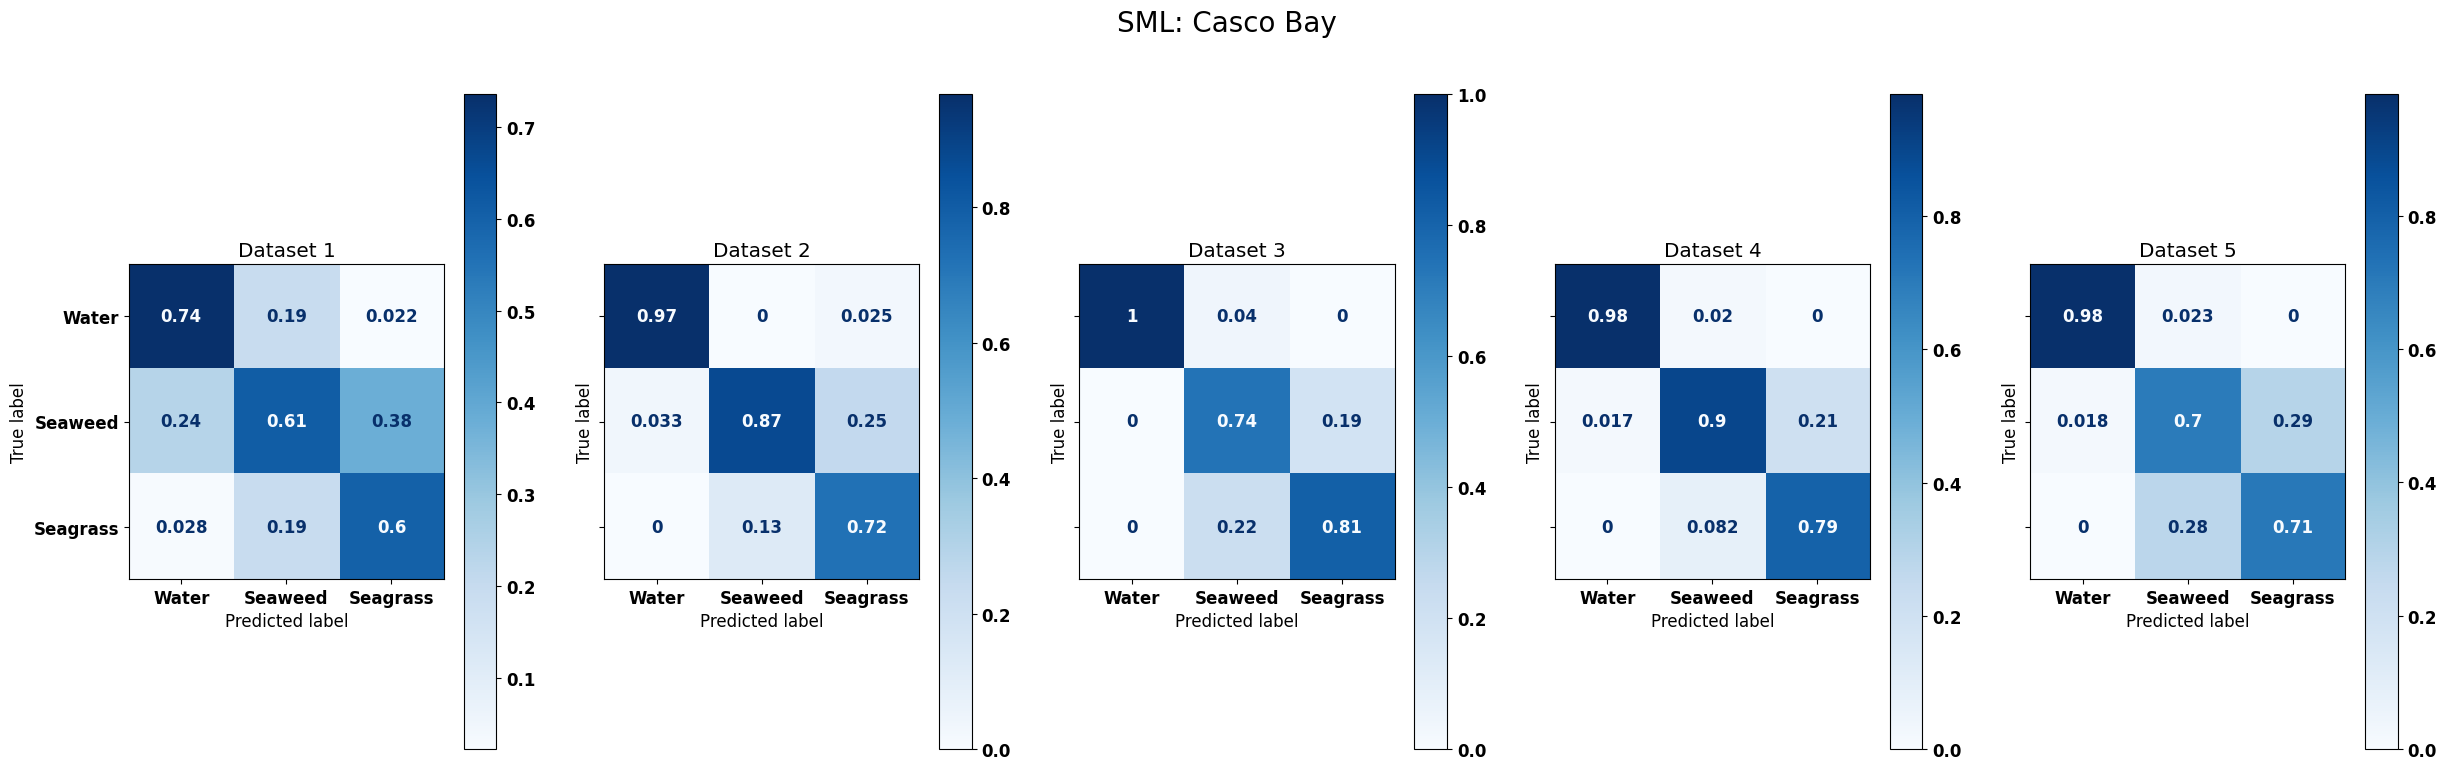

In [ ]:
cm_datsets(cm1, cm2, cm3,cm4 , cm5, 'SML: Casco Bay') 

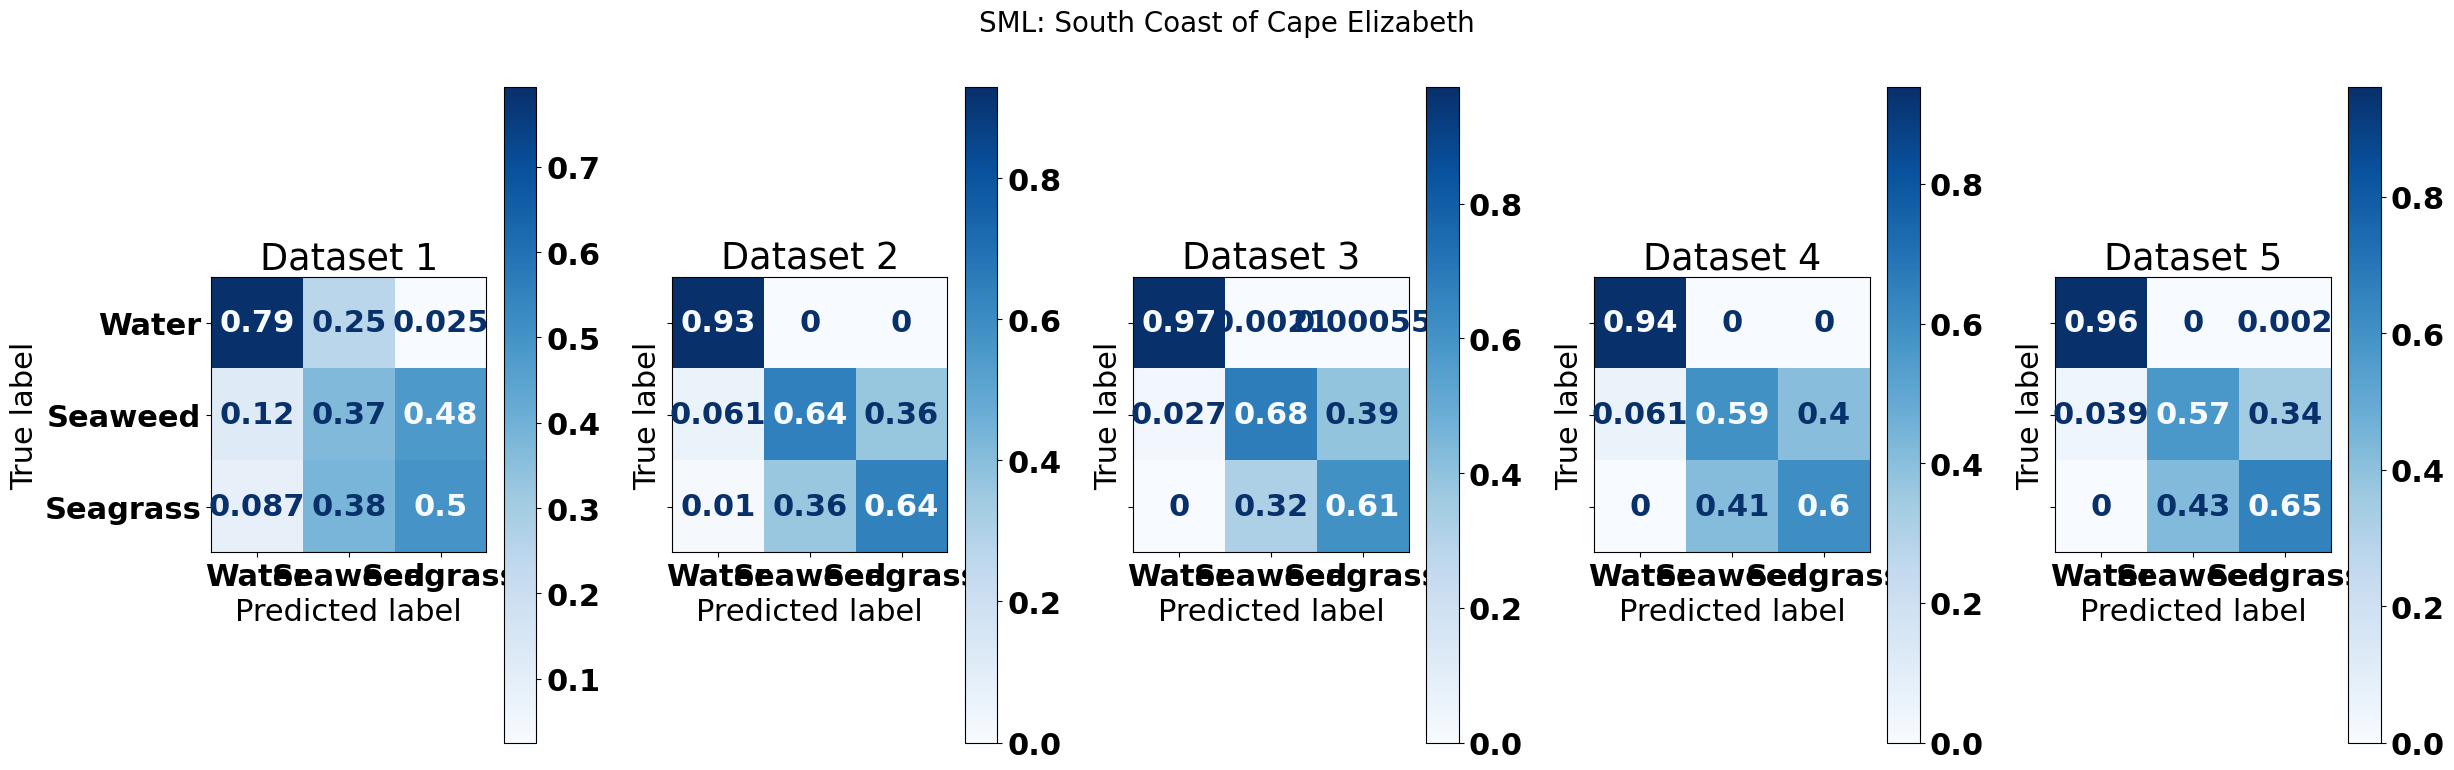

In [ ]:
cm_datsets(cm1t, cm2t, cm3t,cm4t , cm5t, 'SML: South Coast of Cape Elizabeth')

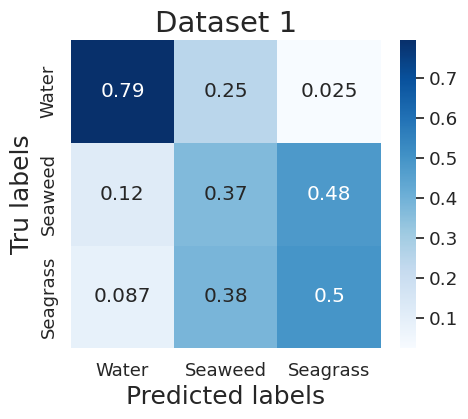

In [ ]:
cm_maker(cm1t, 'Dataset 1')

# SML: Boxplot and Lineplot


FixedFormatter should only be used together with FixedLocator


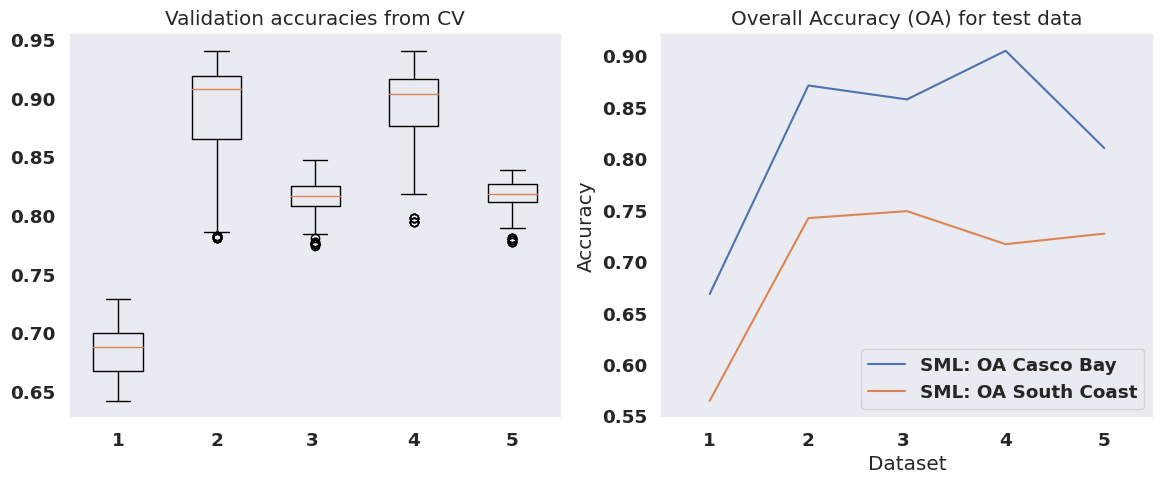

In [ ]:
font_dict = {'fontsize': 20,
            'fontweight':10}

font = {
    'weight' : 'bold',
    'size'   : 12}

fig2, (ax1, ax2) = plt.subplots(1, 2, sharey=False, figsize =(14, 5), sharex = True)
#fig2.suptitle('SML: Boxplot and Lineplot')
ax1.set_xticklabels(['1', '2', '3 ', '4', '5']) # x-axis labels
ax1.boxplot([results1[4], results2[4], results3[4], results4[4], results5[4]])
ax1.set_title('Validation accuracies from CV')

x = [1, 2, 3, 4, 5]
y = [results1[0], results2[0], results3[0], results4[0], results5[0]]
y2 = [results1t[0], results2t[0], results3t[0], results4t[0], results5t[0]]
      
ax2.plot(x, y, label = "SML: OA Casco Bay", )
ax2.plot(x, y2, label = "SML: OA South Coast")
ax2.set_title('Overall Accuracy (OA) for test data')
# Creating plot
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
#values_formatstr
plt.rc('font', **font)
ax1.grid()
ax2.grid()
plt.legend(loc = 'lower right')
plt.show()

# Local Rf training 
source code: https://geemap.org/notebooks/46_local_rf_training/#convert-a-sklearn-classifier-object-to-a-list-of-strings. Accessed: 13.02.23

In [ ]:
def ee_classifier(data):
  y = data.iloc[:,-1]  # Get class lables
  label = y.name       # Get the name of class label
  X = data.drop(label, axis = 1) # Get only feaures 

  # Standardize the data 
  X_std = X 
  # Training dataset set to 80 %
  X_train, X_valid, y_train, y_valid = train_test_split(X_std, y, train_size=0.8, random_state=42)


  rfc=RandomForestClassifier(random_state=42)

  param_grid = {'n_estimators':[int(x) for x in np.linspace(start=10, stop = 30, num = 5)],
              'max_features': ['sqrt', 'log2', None],
              'max_depth':[2,4,10],
              'min_samples_split': [2,5],
              'min_samples_leaf':[1,2],
              'bootstrap':[True, False],
              }

  CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, scoring='accuracy', cv= 10, refit=True)
  CV_rfc.fit(X_train, y_train)
  # Source code: https://datascience.stackexchange.com/questions/21877/how-to-use-the-output-of-gridsearch. Accessed 13.02.23
  optimised_random_forest = CV_rfc.best_estimator_  
  features = list(data.columns)
  feature_names = features[:-1]
  trees = ml.rf_to_strings(optimised_random_forest, feature_names)

 # create a ee classifier to use with ee objects from the trees
  ee_classifier = ml.strings_to_classifier(trees)
  classified = s2_deglint_masked.select(feature_names).classify(ee_classifier)
  return classified, trees
  

In [ ]:
# Storing trees as string in a local csv-file
classify1 = ee_classifier(train1)
ml.trees_to_csv(classify1[1], '/content/classified1.csv')

classify2 = ee_classifier(train2)
ml.trees_to_csv(classify1[1], '/content/classified2.csv')

classify4 = ee_classifier(train4)
ml.trees_to_csv(classify1[1], '/content/classified4.csv')

In [ ]:
classify3 = ee_classifier(train3)
ml.trees_to_csv(classify3[1], '/content/classified3.csv')

classify5 = ee_classifier(train5)
ml.trees_to_csv(classify3[1], '/content/classified5.csv')

In [ ]:
Image1 = classify1[0]

In [ ]:
remap1 = Image1.remap([1,2,3],[0,1,2])

In [ ]:
# retrieving tree
trees1 = ml.csv_to_classifier('/content/classified1.csv') 
trees2 = ml.csv_to_classifier('/content/classified2.csv') 
trees4 = ml.csv_to_classifier('/content/classified4.csv') 

# Create a ee classifier to use with ee objects from the trees
features1 = list(train1.columns)
feature_names1 = features1[:-1]
Image1 = s2_deglint_masked.select(feature_names1).classify(trees1)

# Create a ee classifier to use with ee objects from the trees
features2 = list(train2.columns)
feature_names2 = features2[:-1]
Image2 = s2_deglint_masked.select(feature_names2).classify(trees2)

# Create a ee classifier to use with ee objects from the trees
features4 = list(train4.columns)
feature_names4 = features4[:-1]
Image4 = s2_deglint_masked.select(feature_names4).classify(trees4)


remap1 = Image1.remap([1,2,3],[0,1,2])
remap2 = Image2.remap([1,2,3],[0,1,2])
remap4 = Image4.remap([1,2,3],[0,1,2])

In [ ]:
Image1 =  classify1[0]
Image2 =  classify2[0]
Image4 =  classify4[0]

In [ ]:
remap1 = Image1.remap([1,2,3],[0,1,2])
remap2 = Image2.remap([1,2,3],[0,1,2])
remap4 = Image4.remap([1,2,3],[0,1,2])

In [ ]:
trees3 = ml.csv_to_classifier('/content/classified3.csv') 
trees5 = ml.csv_to_classifier('/content/classified5.csv') 

# Create a ee classifier to use with ee objects from the trees
features3 = list(train3.columns)
feature_names3 = features3[:-1]
Image3 = objectPropertiesImage.select(feature_names3).classify(trees3)

# Create a ee classifier to use with ee objects from the trees
features5 = list(train5.columns)
feature_names5 = features5[:-1]
Image5 = objectPropertiesImage.select(feature_names5).classify(trees5)

remap3 = Image3.remap([1,2,3],[0,1,2])
remap5 = Image5.remap([1,2,3],[0,1,2])

In [ ]:
Image3 = classify3[0]
Image5 = classify5[0]

remap3 = Image3.remap([1,2,3],[0,1,2])
remap5 = Image5.remap([1,2,3],[0,1,2])

# Add ground truth data geometry of seagrass, seaweed, and water

In [ ]:
# Add ground truth data geometry of seagrass, seaweed, and water
# Must upload to google colabs for each new runtime...
shp_path_SW = '/content/Coastal_Marine_Geology.shp'
seaweed_shp = geemap.shp_to_ee(shp_path_SW)
'''
shp_path_SG = '/content/MaineDEP_Seagrass_2021_(South_Coast_-_Elliot_to_Cape_Elizabeth).shp'
seagrass_shp = geemap.shp_to_ee(shp_path_SG)

# Drew rectangles to represent water, than downloaded them locally
# geemap.ee_to_shp(water, filename='/content/water.shp')
shp_path_water_test = '/content/water_test.shp'
water_test_shp = geemap.shp_to_ee(shp_path_water_test)

shp_path_roi_test = '/content/roi_test.shp'
roi_test = geemap.shp_to_ee(shp_path_roi_test)

shp_path_SG22 = '/content/MaineDEP_Seagrass_2022_(Casco_Bay_Only).shp'
seagrass_shp22 = geemap.shp_to_ee(shp_path_SG22)
'''
shp_path_SG18 = '/content/MaineDEP_-_Eelgrass_2018_(Casco_Bay_Only).shp'
seagrass_shp = geemap.shp_to_ee(shp_path_SG18)
shp_path_water = '/content/water.shp'
water_shp = geemap.shp_to_ee(shp_path_water)



# Map results of SML: PB method

- Remember to change title depending if you use this for Casco Bay or for the South Coast of Cape Elizabeth

# Map results of SML: PB-method

In [ ]:
Map = geemap.Map()
Map.set_center(-69.740859, 43.544235, zoom=10)
vis_params = {"bands": [ 'B2', 'B3', 'B4'], "min": 0, "max": 1500, "gamma": 2.5}
Map.addLayer(s2_composite_min, vis_params, 'Sent-2 min')
Map.addLayer(S2_deglint, vis_params, 'Deglinted image')

Map.addLayer(
    remap1,
    {"min": 0, "max": 2, "palette":['deepskyblue', 'chocolate', 'forestgreen']},
    'Dataset 1 SC')

Map.addLayer(
    remap2,
    {"min": 0, "max": 2, "palette": ['deepskyblue', 'chocolate', 'forestgreen']},
    'Dataset 2 SC')

Map.addLayer(
    remap4,
    {"min": 0, "max": 2, "palette": ['deepskyblue', 'chocolate', 'forestgreen']},
    'Dataset 4 SC')


# Source code: https://github.com/giswqs/earthengine-py-examples/blob/master/Visualization/rendering_categorical_maps.py. Accessed: 15.03.23

vis_params_sw = {'color':'#7b3e00'}
vis_params_sg = {'color':'1c5f2c'} 
vis_params_water = {'color':'#0d98ba'}  

Map.addLayer(seagrass_shp, vis_params_sg, 'seagrass from 2021')
#Map.addLayer(seagrass_shp, vis_params_sg, 'seagrass from 2018')
#Map.addLayer(seagrass_shp22, vis_params_sg, 'seagrass from 2022')
Map.addLayer(seaweed_shp, vis_params_sw, 'seaweed')
#Map.addLayer(water_shp, vis_params_water, 'water')
Map.addLayer(water_test_shp, vis_params_water, 'water')
#Map.addLayer(roi_train, {}, 'ROI')')

# display results
#vis_params_sw = {'color':'#7b3e00'}
#vis_params_sg = {'color':'1c5f2c'} 
#vis_params_water = {'color':'#0d98ba'}  
Map.addLayer(S2_masked, {'palette': ['black']} , 'S2 Land Mask')
Map

Map(center=[43.544235, -69.740859], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBo…

# Map results of SML: GEOBIA method

In [ ]:
Map = geemap.Map()
Map.set_center(-69.740859, 43.544235, zoom=10)
#vis_params = {"bands": [ 'B2', 'B3', 'B4'], "min": 0, "max": 1500, "gamma": 2.5}
Map.addLayer(s2_composite_min, vis_params, 'Sent-2 min')
Map.addLayer(S2_deglint, vis_params_deglint, 'Deglinted image')

Map.addLayer(
    remap3,
    {"min": 0, "max": 2, "palette":['deepskyblue', 'chocolate', 'forestgreen']},
    'Dataset 3 Casco Bay')

Map.addLayer(
    remap5,
    {"min": 0, "max": 2, "palette": ['deepskyblue', 'chocolate', 'forestgreen']},
    'Dataset 5 Casco Bay')


# Source code: https://github.com/giswqs/earthengine-py-examples/blob/master/Visualization/rendering_categorical_maps.py. Accessed: 15.03.23

vis_params_sw = {'color':'#7b3e00'}
vis_params_sg = {'color':'1c5f2c'} 
vis_params_water = {'color':'#0d98ba'}  

#Map.addLayer(seagrass_shp, vis_params_sg, 'seagrass from 2021')
#Map.addLayer(seagrass_shp, vis_params_sg, 'seagrass from 2018')
#Map.addLayer(seagrass_shp22, vis_params_sg, 'seagrass from 2022')
#Map.addLayer(seaweed_shp, vis_params_sw, 'seaweed')
#Map.addLayer(water_shp, vis_params_water, 'water')
#Map.addLayer(water_test_shp, vis_params_water, 'water')
#Map.addLayer(roi_train, {}, 'ROI')')

# display results
#vis_params_sw = {'color':'#7b3e00'}
#vis_params_sg = {'color':'1c5f2c'} 
#vis_params_water = {'color':'#0d98ba'}  
Map.addLayer(S2_masked, {'palette': ['black']} , 'S2 Land Mask')
Map

Map(center=[43.544235, -69.740859], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBo…

# Unsupervised classification algorithm

In [ ]:
def unsupervised(data, algorithm = " ", eps=0.3, min_sample=3 ):
  y = data.iloc[:,-1]  # Get class lables
  y = y.replace([1,2,3],[0,1,2])
  label = y.name       # Get the name of class label
  X = data.drop(label, axis = 1) # Get only feaures 
  X_std = StandardScaler().fit_transform(X)
  
  pca = PCA(n_components = 3)
  X_pca = pca.fit(X_std)
  X_trans_pca = pca.transform(X_std)

  if algorithm == 'kMeans':
    km = KMeans(n_clusters=3, max_iter=100, random_state=40, n_init=10)
    km.fit(X_trans_pca)
    y_pred = km.labels_
  elif algorithm == 'DBSCAN':
    db = DBSCAN(eps=eps, min_samples = min_sample, metric='euclidean')
    db_fit = db.fit_predict(X_trans_pca)
    y_pred = db.labels_
  else: 
    print('Error: Missing one positional argument. Insert algorithm name \n "kMeans" or "DBSCAN". \n If this is not the error, you have not inserted the data')
  return accuracy_score(y, y_pred), y_pred, y, X_trans_pca, label
# the scikit-learn algorithm with n_init=10 runs the k-means 10 times and returns the r
# one that gave the lowest SSE
# Source: https://realpython.com/k-means-clustering-python/. Accessed 20.03.23


In [ ]:
# Source code: https://www.mikulskibartosz.name/pca-how-to-choose-the-number-of-components/. Accessed 10.04.23

scaler = MinMaxScaler()
data_rescaled = scaler.fit_transform(train2)
pca = PCA().fit(data_rescaled)

xi = np.arange(1, 8, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k, init='k-means++', n_init='auto')
    X_trans_pca = pca.transform(data_rescaled)
    kmeanModel.fit(X_trans_pca)
    distortions.append(kmeanModel.inertia_)

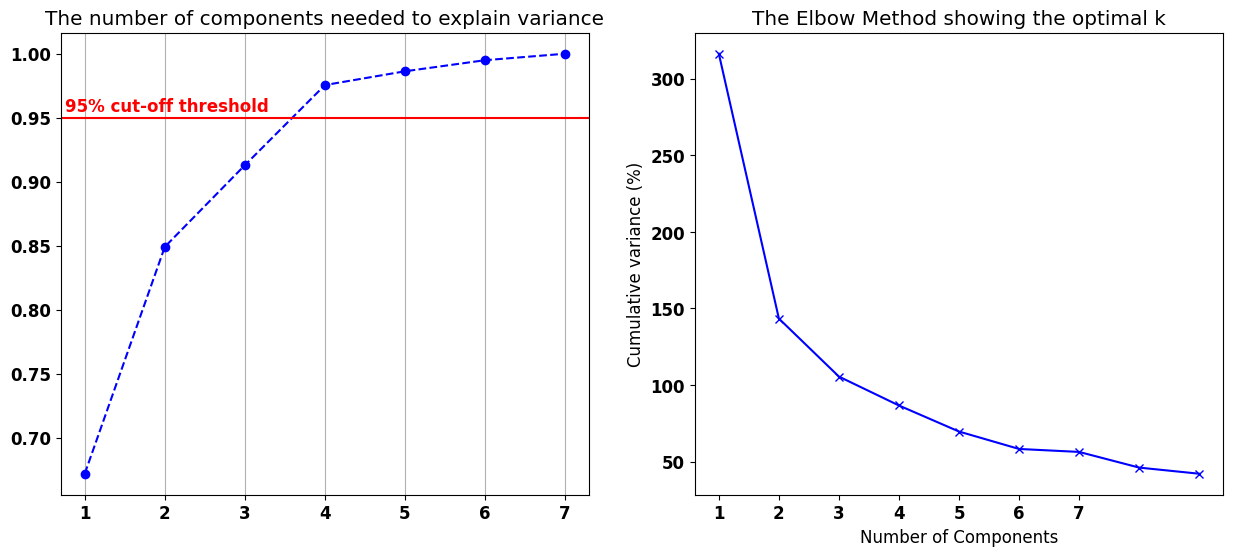

In [ ]:
plt.rcParams["figure.figsize"] = (6,3)

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (15,6))
fig.suptitle('Feature reduction', fontsize=30)
ax1.plot(xi, y, marker='o', linestyle='--', color='b')
ax1.set_title('The number of components needed to explain variance')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 8, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')

ax1.axhline(y=0.95, color='r', linestyle='-')
ax1.text(0.75, 0.955, '95% cut-off threshold', color = 'red', fontsize=12)
ax1.grid(axis='x')

ax2.plot(K, distortions, 'bx-')
ax2.set_title('The Elbow Method showing the optimal k')
plt.show()

# Casco Bay -> Unsupervised accuracy metrices: kMeans

In [ ]:
results1km = unsupervised(train1,'kMeans')
results2km = unsupervised(train2,'kMeans')
results3km = unsupervised(train3,'kMeans')
results4km = unsupervised(train4,'kMeans')
results5km = unsupervised(train5,'kMeans')

resultskm = [results1km, results2km, results3km, results4km, results5km]
data_nr = [1,2,3,4,5]
###############################
# Results from 3 features 
for r, nr in zip(resultskm, data_nr):
  print(f' OA = {r[0]*100:,.2f}% with UML and dataste {nr}')
  kmeans_silhouette = silhouette_score(r[3],r[1]).round(2)
  print('kmeans silhouette: ', kmeans_silhouette)
  print("Adjusted Rand Index: %0.3f"
        % metrics.adjusted_rand_score(r[2], r[1]))
  print('-----------------------------------------------------------------')


 OA = 22.90% with UML and dataste 1
kmeans silhouette:  0.47
Adjusted Rand Index: 0.271
-----------------------------------------------------------------
 OA = 17.48% with UML and dataste 2
kmeans silhouette:  0.35
Adjusted Rand Index: 0.386
-----------------------------------------------------------------
 OA = 41.19% with UML and dataste 3
kmeans silhouette:  0.38
Adjusted Rand Index: 0.032
-----------------------------------------------------------------
 OA = 7.86% with UML and dataste 4
kmeans silhouette:  0.43
Adjusted Rand Index: 0.316
-----------------------------------------------------------------
 OA = 17.62% with UML and dataste 5
kmeans silhouette:  0.47
Adjusted Rand Index: 0.253
-----------------------------------------------------------------


In [ ]:
# Tau values for kmeans at Casco Bay

tau_list = [tau(results1km[0]), tau(results2km[0]), tau(results3km[0]), tau(results4km[0]), tau(results5km[0])]

# Variance
var1km = variance(train1, results1km[0])
var2km = variance(train2, results2km[0])
var3km = variance(train3, results3km[0])
var4km = variance(train4, results4km[0])
var5km = variance(train5, results5km[0])

var_list = [var1km, var2km, var3km, var4km, var5km]

# Dataset numbers
feat_list = [1,2,3,4,5]
print('      Casco Bay: UML')
print(' --------------------------')
print('|Dataset | Tau  | Variance |')
print(' --------------------------')
for i, t, var in zip(feat_list, tau_list, var_list):
  print(f'| {i}      |{t:.3f} |    {var:.3f} |')
print(' --------------------------')


      Casco Bay: UML
 --------------------------
|Dataset | Tau  | Variance |
 --------------------------
| 1      |-0.156 |    0.001 |
| 2      |-0.238 |    0.000 |
| 3      |0.118 |    0.001 |
| 4      |-0.382 |    0.000 |
| 5      |-0.236 |    0.000 |
 --------------------------


In [ ]:
# Classification report all datasets wit SML: Casco Bay
resultskm = [results1km, results2km, results3km, results4km, results5km]
data_nr = [1,2,3,4,5]
for r, nr in zip(resultskm, data_nr):
  names=['water', 'seaweed', 'seagrass']
  
  print(f'           UML, Dataset {nr}, Casco Bay: precision and recall \n' )
  print(classification_report(r[2],r[1], target_names=names))
  print('-----------------------------------------------------------------')

           UML, Dataset 1, Casco Bay: precision and recall 

              precision    recall  f1-score   support

       water       0.02      0.02      0.02       253
     seaweed       0.29      0.50      0.37       241
    seagrass       0.49      0.18      0.26       244

    accuracy                           0.23       738
   macro avg       0.27      0.23      0.22       738
weighted avg       0.27      0.23      0.22       738

-----------------------------------------------------------------
           UML, Dataset 2, Casco Bay: precision and recall 

              precision    recall  f1-score   support

       water       0.01      0.01      0.01       253
     seaweed       0.10      0.10      0.10       241
    seagrass       0.42      0.42      0.42       244

    accuracy                           0.17       738
   macro avg       0.18      0.18      0.18       738
weighted avg       0.17      0.17      0.17       738

--------------------------------------------------

# Test -> Unsupervised accuracy metrices: kMeans

In [ ]:
results1kmt = unsupervised(test1,'kMeans')
results2kmt = unsupervised(test2,'kMeans')
results3kmt = unsupervised(test3,'kMeans')
results4kmt = unsupervised(test4,'kMeans')
results5kmt = unsupervised(test5,'kMeans')

resultskmt = [results1kmt, results2kmt, results3kmt, results4kmt, results5kmt]
data_nr = [1,2,3,4,5]
###############################
# Results from 3 features 
print('-------------UML results for the South Coast of Cape Elizabeth -------------')
for r, nr in zip(resultskmt, data_nr):
  print(f'OA = {r[0]*100:,.2f}% with dataset {nr}')
  kmeans_silhouette = silhouette_score(r[3],r[1]).round(2)
  print('kmeans silhouette: ', kmeans_silhouette)
  print("Adjusted Rand Index: %0.3f"
        % metrics.adjusted_rand_score(r[2], r[1]))
  print('-----------------------------------------------------------------')


-------------UML results for the South Coast of Cape Elizabeth -------------
OA = 18.84% with dataset 1
kmeans silhouette:  0.51
Adjusted Rand Index: 0.096
-----------------------------------------------------------------
OA = 30.07% with dataset 2
kmeans silhouette:  0.37
Adjusted Rand Index: 0.107
-----------------------------------------------------------------
OA = 21.79% with dataset 3
kmeans silhouette:  0.35
Adjusted Rand Index: 0.128
-----------------------------------------------------------------
OA = 32.25% with dataset 4
kmeans silhouette:  0.5
Adjusted Rand Index: 0.522
-----------------------------------------------------------------
OA = 9.95% with dataset 5
kmeans silhouette:  0.52
Adjusted Rand Index: 0.270
-----------------------------------------------------------------


In [ ]:
# Classification report all datasets wit SML: Casco Bay
resultskmt = [results1kmt, results2kmt, results3kmt, results4kmt, results5kmt]
data_nr = [1,2,3,4,5]
for r, nr in zip(resultskmt, data_nr):
  names=['water', 'seaweed', 'seagrass']
  
  print(f'           UML, Dataset {nr}, South Coast: precision and recall \n' )
  print(classification_report(r[2],r[1], target_names=names))
  print('-----------------------------------------------------------------')

           UML, Dataset 1, South Coast: precision and recall 

              precision    recall  f1-score   support

       water       0.00      0.00      0.00        92
     seaweed       0.33      0.01      0.02        92
    seagrass       0.26      0.55      0.35        92

    accuracy                           0.19       276
   macro avg       0.20      0.19      0.12       276
weighted avg       0.20      0.19      0.12       276

-----------------------------------------------------------------
           UML, Dataset 2, South Coast: precision and recall 

              precision    recall  f1-score   support

       water       0.00      0.00      0.00        92
     seaweed       0.46      0.39      0.42        92
    seagrass       0.24      0.51      0.33        92

    accuracy                           0.30       276
   macro avg       0.24      0.30      0.25       276
weighted avg       0.24      0.30      0.25       276

----------------------------------------------

In [ ]:
# Tau values for kmeans at Casco Bay

tau_list = [tau(results1kmt[0]), tau(results2kmt[0]), tau(results3kmt[0]), tau(results4kmt[0]), tau(results5kmt[0])]

# Variance
var1kmt = variance(test1, results1kmt[0])
var2kmt = variance(test2, results2kmt[0])
var3kmt = variance(test3, results3kmt[0])
var4kmt = variance(test4, results4kmt[0])
var5kmt = variance(test5, results5kmt[0])

var_list = [var1kmt, var2kmt, var3kmt, var4kmt, var5kmt]

# Dataset numbers
feat_list = [1,2,3,4,5]
print('      Casco Bay: UML')
print(' --------------------------')
print('|Dataset | Tau  | Variance |')
print(' --------------------------')
for i, t, var in zip(feat_list, tau_list, var_list):
  print(f'| {i}      |{t:.3f} |    {var:.3f} |')
print(' --------------------------')

      Casco Bay: UML
 --------------------------
|Dataset | Tau  | Variance |
 --------------------------
| 1      |-0.217 |    0.001 |
| 2      |-0.049 |    0.002 |
| 3      |-0.173 |    0.000 |
| 4      |-0.016 |    0.002 |
| 5      |-0.351 |    0.000 |
 --------------------------


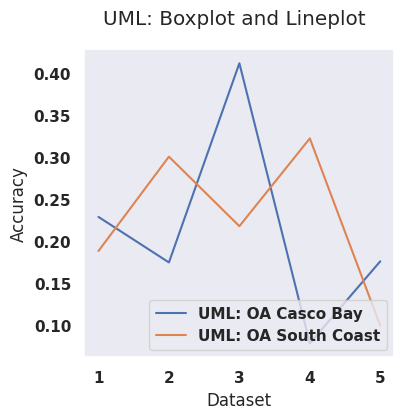

In [ ]:
font_dict = {'fontsize': 15,
            'fontweight':10}

font = {
    'weight' : 'bold',
    'size'   : 12}

fig2, (ax2) = plt.subplots(1, figsize =(4, 4))
fig2.suptitle('UML: Boxplot and Lineplot')
 
ax2.plot(x, y, label = "UML: OA Casco Bay" )
ax2.plot(x, y2, label = "UML: OA South Coast")
# Creating plot
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
#values_formatstr
plt.rc('font', **font)
ax1.grid()
ax2.grid()
plt.legend(loc = 'lower right')
plt.show()

# UML

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


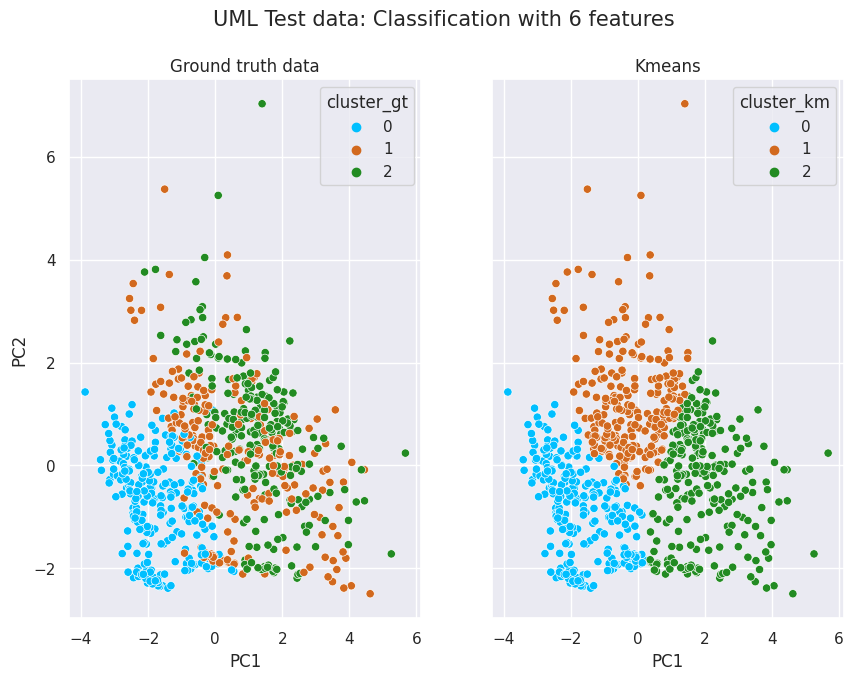

In [ ]:
def UML_visuals(data):
  y = data.iloc[:,-1]  # Get class lables
  y = y.replace([1,2,3],[0,1,2])
  label = y.name       # Get the name of class label
  X = data.drop(label, axis = 1) # Get only feaures

  # Source code: https://stackoverflow.com/questions/66204637/visualizing-clusters-result-using-pca-python. Accessed 27.03.2023
  Sc = StandardScaler()  # Alternativley use:  MinMaxScaler() when data is not normally distributed (for the training data)
  X = Sc.fit_transform(X)
  pca = PCA(3) 
  pca_data = pd.DataFrame(pca.fit_transform(X),columns=['PC1','PC2', 'PC3']) 

  kmeans =KMeans(n_clusters=3).fit(X)
  # Classified clusters 
  pca_data['cluster_km'] = pd.Categorical(kmeans.labels_)

  # Ground truth data 
  pca_data['cluster_gt'] = pd.Categorical(y)

  #set seaborn plotting aesthetics as default
  sns.set()

  #define plotting region (1 rows, 2 columns)
  fig, axes = plt.subplots(1, 2, sharey = True, figsize=(10, 7))

  fig.suptitle('UML Test data: Classification with 6 features', fontsize=15)
  palette = {0: "deepskyblue", 1: "chocolate", 2: "forestgreen"}

  sns.scatterplot(data=pca_data, x="PC1",y="PC2",hue="cluster_gt", palette = palette, ax=axes[0]).set(title='Ground truth data')
  sns.scatterplot(data=pca_data, x="PC1",y="PC2",hue="cluster_km", palette = palette ,ax=axes[1]).set(title='Kmeans')

  return plt.show()

UML_visuals(train2)

# Confusion matrices of UML

In [ ]:
# cm for Casco Bay 
cm1km = confusion_matrix(results1km[2],results1km[1])
cm2km = confusion_matrix(results2km[2],results2km[1])
cm3km = confusion_matrix(results3km[2],results3km[1])
cm4km = confusion_matrix(results4km[2],results4km[1])
cm5km = confusion_matrix(results5km[2],results5km[1])

# cm fomr South Coast
cm1kmt = confusion_matrix(results1kmt[2],results1kmt[1])
cm2kmt = confusion_matrix(results2kmt[2],results2kmt[1])
cm3kmt = confusion_matrix(results3kmt[2],results3kmt[1])
cm4kmt = confusion_matrix(results4kmt[2],results4kmt[1])
cm5kmt = confusion_matrix(results5kmt[2],results5kmt[1])

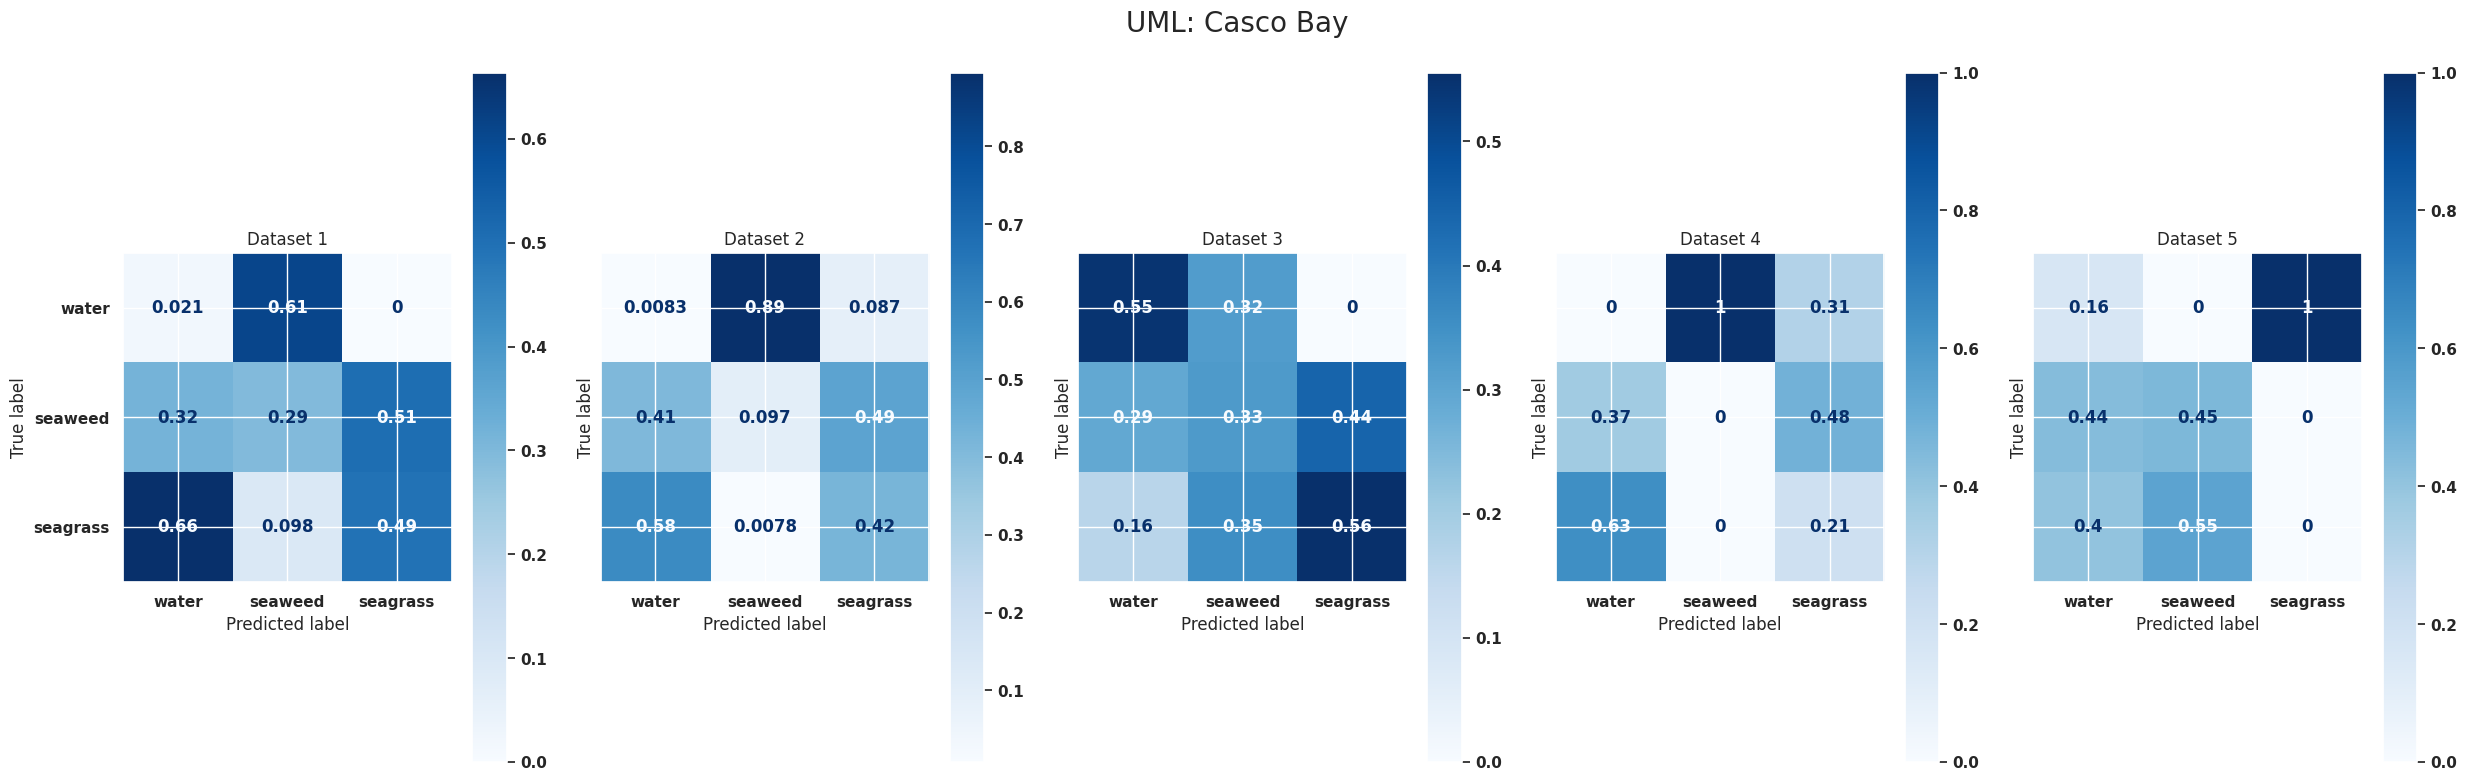

In [ ]:
cm_datsets(cm1km, cm2km, cm3km,cm4km , cm5km, 'UML: Casco Bay') 

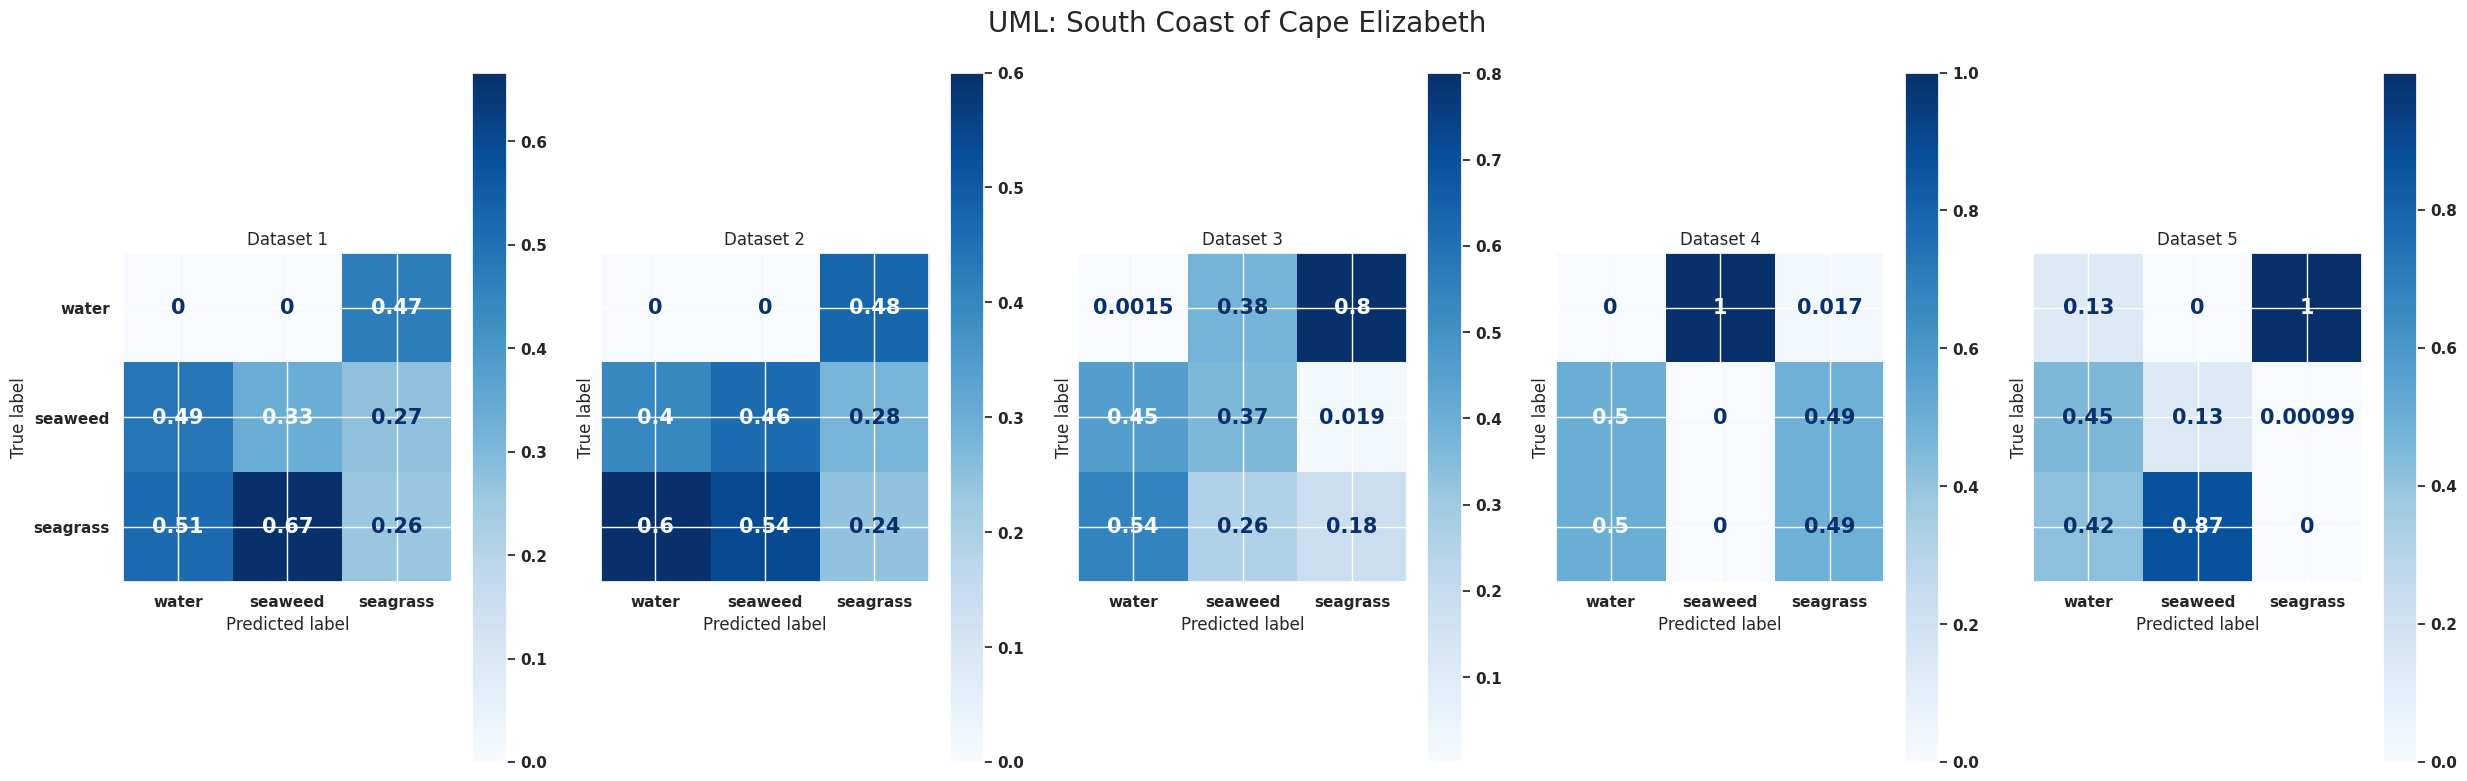

In [ ]:
cm_datsets(cm1kmt, cm2kmt, cm3kmt, cm4kmt , cm5kmt, 'UML: South Coast of Cape Elizabeth')

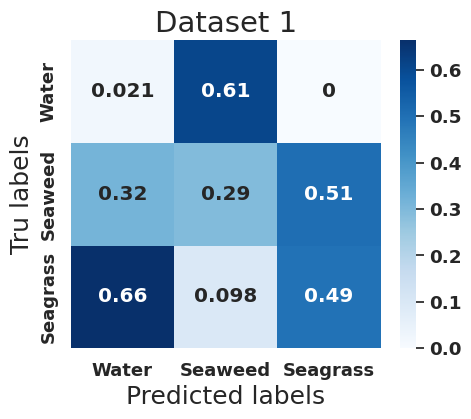

In [ ]:
cm_maker(cm1km, 'Dataset 1')

# Visual SSL

In [ ]:
def ee_classifier_ss(data):
  y = data.iloc[:,-1]  # Get class lables
  label = y.name       # Get the name of class label
  X = data.drop(label, axis = 1) # Get only feaures 

  # Standardize the data 
  X_std = X #StandardScaler().fit_transform(X)

  # Firstly, the dataset is split into a unlabeled and a remaining datasets
  # X_unlabled is 80% of the total dataset
  X_unlabled, X_rem, y_unlabled, y_rem = train_test_split(X_std, y, train_size=0.8, random_state=42)

  # Then, the remaining data is split into a labeled and a test dataset. 
  # we have to define valid_size=0.5 (that is 50% of remaining data)
  # The labled and test datasets each conaints 10% of the samples from the total data 
  test_size = 0.5
  X_labeled, X_test, y_labeled, y_test = train_test_split(X_rem,y_rem, test_size=0.5, random_state=42, shuffle=True)

  # Create a training and validation data from the labled data
  X_train, X_valid, y_train, y_valid = train_test_split(X_labeled,y_labeled, test_size=0.5, random_state=42, shuffle=True)

  # Initialize classifier
  rfc=RandomForestClassifier(random_state=42)
  param_grid = {'n_estimators':[int(x) for x in np.linspace(start=10, stop = 30, num = 5)],
              'max_features': ['sqrt', 'log2', None],
              'max_depth':[2,4,10],
              'min_samples_split': [2,5],
              'min_samples_leaf':[1,2],
              'bootstrap':[True, False]}

  CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, scoring='accuracy', cv= 5, refit=True)
  CV_rfc.fit(X_train, y_train)

  preds = CV_rfc.predict(X_unlabled)

  # Merge dataset containing the labels
  y_pseudo = np.append(preds, y_train)

  # Merge dataset containing samples 
  pseudo_data = np.append(X_unlabled, X_train, axis=0)

  rf = RandomForestClassifier(random_state=3)

  CV_rf = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy', cv= 5, refit=True)
  CV_rf.fit(pseudo_data, y_pseudo)

  # Source code: https://datascience.stackexchange.com/questions/21877/how-to-use-the-output-of-gridsearch. Accessed 13.02.23
  optimised_random_forest = CV_rf.best_estimator_  
  features = list(data.columns)
  feature_names = features[:-1]
  trees = ml.rf_to_strings(optimised_random_forest, feature_names)

 # create a ee classifier to use with ee objects from the trees
  ee_classifier = ml.strings_to_classifier(trees)
  classified = objectPropertiesImage.select(feature_names).classify(ee_classifier)
  return classified, trees

In [ ]:
# Storing trees as string in a local csv-file
classify1ss = ee_classifier_ss(train1)
ml.trees_to_csv(classify1ss[1], '/content/classified1ss.csv')

classify2ss = ee_classifier_ss(train2)
ml.trees_to_csv(classify1ss[1], '/content/classified2ss.csv')

classify4ss = ee_classifier_ss(train4)
ml.trees_to_csv(classify1ss[1], '/content/classified4ss.csv')

In [ ]:
classify3ss = ee_classifier_ss(train3)
ml.trees_to_csv(classify3ss[1], '/content/classified3ss.csv')

classify5ss = ee_classifier_ss(train5)
ml.trees_to_csv(classify5ss[1], '/content/classified5ss.csv')

In [ ]:
# retrieving tree
trees1ss = ml.csv_to_classifier('/content/classified1ss.csv') 
trees2ss = ml.csv_to_classifier('/content/classified2ss.csv') 
trees4ss = ml.csv_to_classifier('/content/classified4ss.csv') 

# Create a ee classifier to use with ee objects from the trees
features1 = list(train1.columns)
feature_names1 = features1[:-1]
Image1ss = s2_deglint_masked.select(feature_names1).classify(trees1)

# Create a ee classifier to use with ee objects from the trees
features2 = list(train2.columns)
feature_names2 = features2[:-1]
Image2ss = s2_deglint_masked.select(feature_names2).classify(trees2)

# Create a ee classifier to use with ee objects from the trees
features4 = list(train4.columns)
feature_names4 = features4[:-1]
Image4ss = s2_deglint_masked.select(feature_names4).classify(trees4)


remap1ssl = Image1ss.remap([1,2,3],[0,1,2])
remap2ssl = Image2ss.remap([1,2,3],[0,1,2])
remap4ssl = Image4ss.remap([1,2,3],[0,1,2])

In [ ]:
Image1ss = classify1ss[0]
Image2ss = classify2ss[0]
Image4ss = classify4ss[0]

remap1ssl= Image1ss.remap([1,2,3],[0,1,2])
remap2ssl= Image2ss.remap([1,2,3],[0,1,2])
remap4ssl= Image4ss.remap([1,2,3],[0,1,2])

In [ ]:
trees3ss = ml.csv_to_classifier('/content/classified3ss.csv') 
trees5ss = ml.csv_to_classifier('/content/classified5ss.csv') 

# Create a ee classifier to use with ee objects from the trees
features3 = list(train3.columns)
feature_names3 = features3[:-1]
Image3ss = objectPropertiesImage.select(feature_names3).classify(trees3)

# Create a ee classifier to use with ee objects from the trees
features5 = list(train5.columns)
feature_names5 = features5[:-1]
Image5ss = objectPropertiesImage.select(feature_names5).classify(trees5)

remap3ssl = Image3ss.remap([1,2,3],[0,1,2])
remap5ssl = Image5ss.remap([1,2,3],[0,1,2])

In [ ]:
Image3ss = classify3ss[0]
remap3ss= Image3ss.remap([1,2,3],[0,1,2])

Image5ss = classify5ss[0]
remap5ss= Image5ss.remap([1,2,3],[0,1,2])

In [ ]:
Map = geemap.Map()
Map.set_center(-69.740859, 43.544235, zoom=10)
vis_params = {"bands": [ 'B2', 'B3', 'B4'], "min": 0, "max": 1500, "gamma": 2.5}
#Map.addLayer(s2_composite_min, vis_params, 'Sent-2 min')
Map.addLayer(S2_deglint, vis_params_deglint, 'Deglinted image')

Map.addLayer(
    remap1ssl,
    {"min": 0, "max": 2, "palette":['deepskyblue', 'chocolate', 'forestgreen']},
    'Dataset 1 SC')

Map.addLayer(
    remap2ssl,
    {"min": 0, "max": 2, "palette": ['deepskyblue', 'chocolate', 'forestgreen']},
    'Dataset 2 SC')

Map.addLayer(
    remap4ssl,
    {"min": 0, "max": 2, "palette": ['deepskyblue', 'chocolate', 'forestgreen']},
    'Dataset 4 SC')

# Source code: https://github.com/giswqs/earthengine-py-examples/blob/master/Visualization/rendering_categorical_maps.py. Accessed: 15.03.23

vis_params_sw = {'color':'#7b3e00'}
vis_params_sg = {'color':'1c5f2c'} 
vis_params_water = {'color':'#0d98ba'}  

#Map.addLayer(seagrass_shp, vis_params_sg, 'seagrass from 2021')
#Map.addLayer(seagrass_shp, vis_params_sg, 'seagrass from 2018')
#Map.addLayer(seagrass_shp22, vis_params_sg, 'seagrass from 2022')
#Map.addLayer(seaweed_shp, vis_params_sw, 'seaweed')
#Map.addLayer(water_shp, vis_params_water, 'water')
#Map.addLayer(water_test_shp, vis_params_water, 'water')
#Map.addLayer(roi_train, {}, 'ROI')')

# display results
#vis_params_sw = {'color':'#7b3e00'}
#vis_params_sg = {'color':'1c5f2c'} 
#vis_params_water = {'color':'#0d98ba'}  
Map.addLayer(S2_masked, {'palette': ['black']} , 'S2 Land Mask')
Map

Map(center=[43.544235, -69.740859], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBo…

In [ ]:
Map = geemap.Map()
Map.set_center(-69.740859, 43.544235, zoom=10)
#vis_params = {"bands": [ 'B2', 'B3', 'B4'], "min": 0, "max": 1500, "gamma": 2.5}
Map.addLayer(s2_composite_min, vis_params, 'Sent-2 min')
Map.addLayer(S2_deglint, vis_params_deglint, 'Deglinted image')

Map.addLayer(
    remap3ssl,
    {"min": 0, "max": 2, "palette":['deepskyblue', 'chocolate', 'forestgreen']},
    'Dataset 3 Casco Bay')

Map.addLayer(
    remap5ssl,
    {"min": 0, "max": 2, "palette": ['deepskyblue', 'chocolate', 'forestgreen']},
    'Dataset 5 Casco Bay')

# Source code: https://github.com/giswqs/earthengine-py-examples/blob/master/Visualization/rendering_categorical_maps.py. Accessed: 15.03.23

vis_params_sw = {'color':'#7b3e00'}
vis_params_sg = {'color':'1c5f2c'} 
vis_params_water = {'color':'#0d98ba'}  

#Map.addLayer(seagrass_shp, vis_params_sg, 'seagrass from 2021')
#Map.addLayer(seagrass_shp, vis_params_sg, 'seagrass from 2018')
#Map.addLayer(seagrass_shp22, vis_params_sg, 'seagrass from 2022')
#Map.addLayer(seaweed_shp, vis_params_sw, 'seaweed')
#Map.addLayer(water_shp, vis_params_water, 'water')
#Map.addLayer(water_test_shp, vis_params_water, 'water')
#Map.addLayer(roi_train, {}, 'ROI')')

# display results
#vis_params_sw = {'color':'#7b3e00'}
#vis_params_sg = {'color':'1c5f2c'} 
#vis_params_water = {'color':'#0d98ba'}  
Map.addLayer(S2_masked, {'palette': ['black']} , 'S2 Land Mask')
Map

Map(center=[43.544235, -69.740859], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBo…

# Semisupervised with Random Forest

In [ ]:
# Create a flow diagram - CLEARLY explain this process!!
def semiSupervised(data): 

  if str(type(data.iloc[:,-1][0])) == str:
  # Convert integers into meaningfull labels
    data.iloc[:,-1].replace(['water','seaweed','seagrass'], [1,2,3], inplace=True)

  y = data.iloc[:,-1]  # Get class lables
  label = y.name       # Get the name of class label
  X = data.drop(label, axis = 1) # Get only feaures 
  X_std =X #  StandardScaler().fit_transform(X)

  # Firstly, the dataset is split into a unlabeled and a remaining datasets
  # X_unlabled is 80% of the total dataset
  X_unlabled, X_rem, y_unlabled, y_rem = train_test_split(X_std, y, train_size=0.8, random_state=42)

  # Then, the remaining data is split into a labeled and a test dataset. 
  # we have to define valid_size=0.5 (that is 50% of remaining data)
  # The labled and test datasets each conaints 10% of the samples from the total data 

  test_size = 0.5
  X_labeled, X_test, y_labeled, y_test = train_test_split(X_rem,y_rem, test_size=0.5, random_state=42, shuffle=True)

  # Create a training and validation data from the labled data
  X_train, X_valid, y_train, y_valid = train_test_split(X_labeled,y_labeled, test_size=0.5, random_state=42, shuffle=True)

 # Initialize classifier
  rfc=RandomForestClassifier(random_state=42)
  param_grid = {'n_estimators':[int(x) for x in np.linspace(start=10, stop = 30, num = 5)],
              'max_features': ['sqrt', 'log2', None],
              'max_depth':[2,4,10],
              'min_samples_split': [2,5],
              'min_samples_leaf':[1,2],
              'bootstrap':[True, False]}

  CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, scoring='accuracy', cv= 5, refit=True)
  CV_rfc.fit(X_train, y_train)

  preds = CV_rfc.predict(X_unlabled)

  # Merge dataset containing the labels
  y_pseudo = np.append(preds, y_train)

  # Merge dataset containing samples 
  pseudo_data = np.append(X_unlabled, X_train, axis=0)

  rf = RandomForestClassifier(random_state=3)

  CV_rf = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy', cv= 10, refit=True)
  CV_rf.fit(pseudo_data, y_pseudo)

  explainer = shap.Explainer(CV_rf.predict, X_test)
  # Calculates the SHAP values - It takes some time
  shap_values = explainer(X_test) # use --> if warning appears .values

  preds_pseudo = CV_rf.predict(X_test)
  mean_test_score_3f = CV_rf.cv_results_['mean_test_score']
  '''
  Returns the overall accuracy of the classifier, the number of features, and an array containing all the predicted values
  ''' 
  return accuracy_score(y_test, preds_pseudo), len(X.columns), preds_pseudo, y_test, mean_test_score_3f, shap_values


In [ ]:
# Running results 
print('----------- SSL classification of validation data -----------')
training = [train1, train2, train3, train4, train5]
datanr = [1,2,3,4,5]

for train, nr in zip(training,datanr):
  start = time.time()
  results = semiSupervised(train)
  print(f'OA = {results[0]*100:,.2f}%  for dataset {nr}, execution time = {(time.time() - start)/60:,.2f} minutes')
  print('-----------------------------------------------------------------')

----------- SSL classification of validation data -----------
OA = 48.65%  for dataset 1, execution time = 4.28 minutes
-----------------------------------------------------------------
OA = 81.08%  for dataset 2, execution time = 4.09 minutes
-----------------------------------------------------------------


Permutation explainer: 75it [00:16,  1.77it/s]


OA = 68.92%  for dataset 3, execution time = 5.17 minutes
-----------------------------------------------------------------
OA = 82.43%  for dataset 4, execution time = 3.68 minutes
-----------------------------------------------------------------
OA = 68.92%  for dataset 5, execution time = 4.15 minutes
-----------------------------------------------------------------


In [ ]:
# Storing results for the individual datasets, for later use 
results1ss = semiSupervised(train1)
results2ss = semiSupervised(train2)
results3ss = semiSupervised(train3)
results4ss = semiSupervised(train4)
results5ss = semiSupervised(train5)

Permutation explainer: 75it [00:17,  1.96it/s]


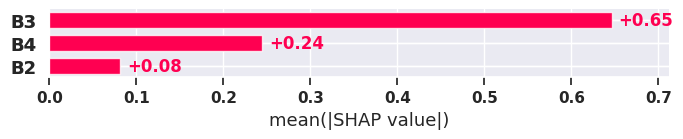

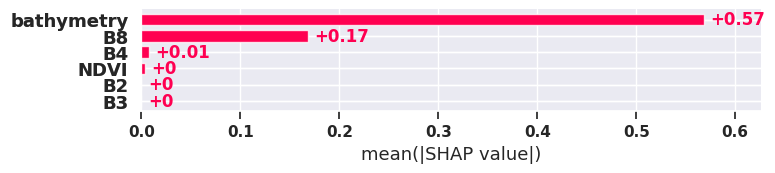

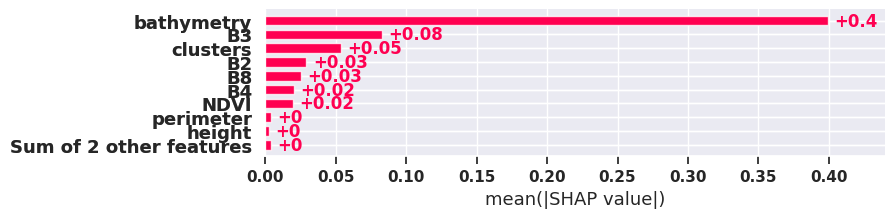

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(8,8))
plt.subplot(3,1,1)
shap.plots.bar(results1ss[5])
plt.subplot(3,1,2)
shap.plots.bar(results2ss[5])
plt.subplot(3,1,3)
shap.plots.bar(results3ss[5])
plt.tight_layout()
plt.show()

In [ ]:
# Classification report all datasets wit SML: Casco Bay
results = [results1ss, results2ss, results3ss, results4ss, results5ss]
data_nr = [1,2,3,4,5]
for r, nr in zip(results, data_nr):
  names=['water', 'seaweed', 'seagrass']
  
  print(f'           SSL, Dataset {nr}, Casco Bay: precision and recall \n' )
  print(classification_report(r[3],r[2], target_names=names))
  print('-----------------------------------------------------------------')

           SSL, Dataset 1, Casco Bay: precision and recall 

              precision    recall  f1-score   support

       water       0.65      0.77      0.70        26
     seaweed       0.35      0.19      0.25        31
    seagrass       0.38      0.59      0.47        17

    accuracy                           0.49        74
   macro avg       0.46      0.52      0.47        74
weighted avg       0.46      0.49      0.46        74

-----------------------------------------------------------------
           SSL, Dataset 2, Casco Bay: precision and recall 

              precision    recall  f1-score   support

       water       1.00      0.92      0.96        26
     seaweed       0.76      0.81      0.78        31
    seagrass       0.65      0.65      0.65        17

    accuracy                           0.81        74
   macro avg       0.80      0.79      0.80        74
weighted avg       0.82      0.81      0.81        74

--------------------------------------------------

In [ ]:
# Tau values for the South Coast of Cape Elizabeth
tau_list = [tau(results1ss[0]), tau(results2ss[0]), tau(results3ss[0]), tau(results4ss[0]), tau(results5ss[0])]

# Variance
var3ss = variance(train1, results1ss[0])
var6ss = variance(train2, results2ss[0])
var11ss = variance(train3, results3ss[0])
varPBbestss= variance(train4, results4ss[0])
varOBIAbestss = variance(train5, results5[0])
var_list = [var3ss, var6ss, var11ss, varPBbestss, varOBIAbestss]

# Dataset numbers
feat_list = [1,2,3,4,5]
print('Casco Bay: SSL')
print(' --------------------------')
print('|Dataset | Tau  | Variance |')
print(' --------------------------')
for i, t, var in zip(feat_list, tau_list, var_list):
  print(f'| {i}      |{t:.3f} |    {var:.3f} |')
print(' --------------------------')

Casco Bay: SSL
 --------------------------
|Dataset | Tau  | Variance |
 --------------------------
| 1      |0.230 |    0.001 |
| 2      |0.716 |    0.000 |
| 3      |0.534 |    0.001 |
| 4      |0.736 |    0.000 |
| 5      |0.534 |    0.000 |
 --------------------------


# SSL: Error matrix training data

In [ ]:
cm1ss = confusion_matrix(results1ss[3],results1ss[2])
cm2ss = confusion_matrix(results2ss[3],results2ss[2])
cm3ss = confusion_matrix(results3ss[3],results3ss[2])
cm4ss = confusion_matrix(results4ss[3],results4ss[2])
cm5ss = confusion_matrix(results5ss[3],results5ss[2])

cm1sst = confusion_matrix(results1sst[3],results1sst[2])
cm2sst = confusion_matrix(results2sst[3],results2sst[2])
cm3sst = confusion_matrix(results3sst[3],results3sst[2])
cm4sst = confusion_matrix(results4sst[3],results4sst[2])
cm5sst = confusion_matrix(results5sst[3],results5sst[2])

# SSL: Test data

In [ ]:
# Create a flow diagram - CLEARLY explain this process!!
def semiSupervised_test(data, data_test):

  if str(type(data.iloc[:,-1][0])) == str:
  # Convert integers into meaningfull labels
    data.iloc[:,-1].replace(['water','seaweed','seagrass'], [1,2,3], inplace=True)

  y = data.iloc[:,-1]  # Get class lables
  label = y.name       # Get the name of class label
  X = data.drop(label, axis = 1) # Get only feaures 
  #y=y.astype('int')  # y was firstly of type 'object', needs to be an integer for sklearn to recognize it.
  X_std = StandardScaler().fit_transform(X)

  # Firstly, the dataset is split into a unlabeled and a remaining datasets
  # X_unlabled is 80% of the total dataset
  X_unlabled, X_rem, y_unlabled, y_rem = train_test_split(X_std, y, train_size=0.8, random_state=42)

  # Then, the remaining data is split into a labeled and a test dataset. 
  # we have to define valid_size=0.5 (that is 50% of remaining data)
  # The labled and test datasets each conaints 10% of the samples from the total data 

  test_size = 0.5
  X_labeled, X_test, y_labeled, y_test = train_test_split(X_rem, y_rem, test_size=0.5, random_state=42, shuffle=True)

  # Create a training and validation data from the labled data
  X_train, X_valid, y_train, y_valid = train_test_split(X_labeled, y_labeled, test_size=0.5, random_state=42, shuffle=True)


  # Initialize classifier
  rfc=RandomForestClassifier(random_state=42)
  param_grid = {'n_estimators':[int(x) for x in np.linspace(start=10, stop = 30, num = 5)],
              'max_features': ['sqrt', 'log2', None],
              'max_depth':[2,4,10],
              'min_samples_split': [2,5],
              'min_samples_leaf':[1,2],
              'bootstrap':[True, False]}

# USe cv = 10 to train on as "much" training samples as possible from the data we have
  CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, scoring='accuracy', cv= 10, refit=True)
  CV_rfc.fit(X_train, y_train)

  preds = CV_rfc.predict(X_unlabled)

  # Merge dataset containing the labels
  # Merge dataset containing the labels
  y_pseudo = np.append(preds, y_train)

  # Merge dataset containing samples 
  pseudo_data = np.append(X_unlabled, X_train, axis=0)

  rf = RandomForestClassifier(random_state=3)

# As cv=integer (5) and y is a multiclass, stratified k-fold is used. This means that the preserves the percentage of samples of each class in each split.
# See documentation: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html. Accesssed. 21.03.23
# Source: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold. Accesssed. 21.03.23
# Use cv = 5 to train pseudo data on, set to 5 to have bigger test-data sets to test on.
  CV_rf = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy', cv= 5, refit=True)
  CV_rf.fit(pseudo_data, y_pseudo)

  y_test2= data_test.iloc[:,-1]  # Get class lables
  label = y_test2.name       # Get the name of class label
  X_test2 = data_test.drop(label, axis = 1) # Get only feaures 
  X_std_test = StandardScaler().fit_transform(X_test2)

  preds_pseudo = CV_rf.predict(X_std_test)
  cm = confusion_matrix(preds_pseudo, y_test2)
  mean_test_score_3f = CV_rfc.cv_results_['mean_test_score']
  return accuracy_score(y_test2, preds_pseudo), len(X.columns), preds_pseudo, y_test2, mean_test_score_3f
  '''
  Returns the overall accuracy of the classifier, the number of features, and an array containing all the predicted values
  '''


In [ ]:
# Running results of dataset of same size:
print('----------- SSL classification of validation data -----------')
training = [train1, train2, train3, train4, train5]
testing = [test1, test2, test3, test4, test5]
datanr = [1,2,3,4,5]

for train, test, nr in zip(training, testing, datanr):
  start = time.time()
  resultst = semiSupervised_test(train, test)
  print(f'OA = {resultst[0]*100:,.2f}%  for dataset {nr}, execution time = {(time.time() - start)/60:,.2f} minutes')
  print('-----------------------------------------------------------------')


# Storing results for the individual datasets, for later use 
results1sst = semiSupervised_test(train1, test1)
results2sst = semiSupervised_test(train2, test2)
results3sst = semiSupervised_test(train3, test3)
results4sst = semiSupervised_test(train4, test4)
results5sst = semiSupervised_test(train5, test5)

----------- SSL classification of validation data -----------
OA = 58.70%  for dataset 1, execution time = 3.77 minutes
-----------------------------------------------------------------
OA = 76.09%  for dataset 2, execution time = 3.64 minutes
-----------------------------------------------------------------
OA = 67.62%  for dataset 3, execution time = 4.09 minutes
-----------------------------------------------------------------
OA = 73.55%  for dataset 4, execution time = 4.00 minutes
-----------------------------------------------------------------
OA = 71.11%  for dataset 5, execution time = 3.79 minutes
-----------------------------------------------------------------


In [ ]:
# Storing results for the individual datasets, for later use 
results1sst = semiSupervised_test(train1, test1)
results2sst = semiSupervised_test(train2, test2)
results3sst = semiSupervised_test(train3, test3)
results4sst = semiSupervised_test(train4, test4)
results5sst = semiSupervised_test(train5, test5)

The least populated class in y has only 7 members, which is less than n_splits=10.
The least populated class in y has only 7 members, which is less than n_splits=10.
The least populated class in y has only 7 members, which is less than n_splits=10.


In [ ]:
# Classification report all datasets wit SML: Casco Bay
results = [results1sst, results2sst, results3sst, results4sst, results5sst]
data_nr = [1,2,3,4,5]
for r, nr in zip(results, data_nr):
  names=['water', 'seaweed', 'seagrass']
  
  print(f'           SSL, Dataset {nr}, South Coast: precision and recall \n' )
  print(classification_report(r[3],r[2], target_names=names))
  print('-----------------------------------------------------------------')

           SSL, Dataset 1, South Coast: precision and recall 

              precision    recall  f1-score   support

       water       0.74      0.91      0.82        92
     seaweed       0.46      0.51      0.48        92
    seagrass       0.51      0.34      0.41        92

    accuracy                           0.59       276
   macro avg       0.57      0.59      0.57       276
weighted avg       0.57      0.59      0.57       276

-----------------------------------------------------------------
           SSL, Dataset 2, South Coast: precision and recall 

              precision    recall  f1-score   support

       water       1.00      1.00      1.00        92
     seaweed       0.64      0.64      0.64        92
    seagrass       0.64      0.64      0.64        92

    accuracy                           0.76       276
   macro avg       0.76      0.76      0.76       276
weighted avg       0.76      0.76      0.76       276

----------------------------------------------

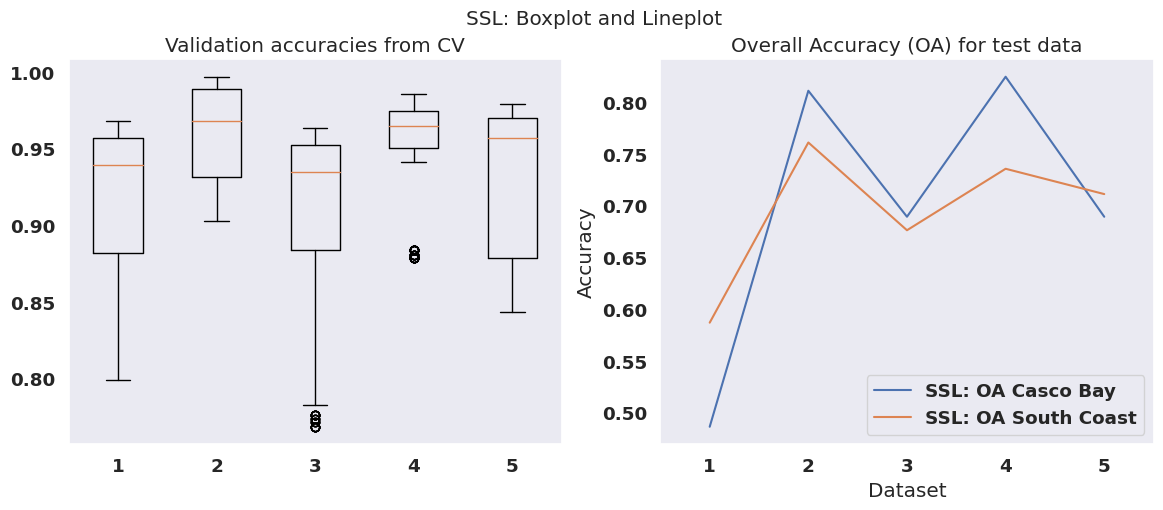

In [ ]:
font_dict = {'fontsize': 20,
            'fontweight':10}

font = {
    'weight' : 'bold',
    'size'   : 12}

fig2, (ax1, ax2) = plt.subplots(1, 2, sharey=False, figsize =(14, 5), sharex = True)
fig2.suptitle('SSL: Boxplot and Lineplot')
ax1.set_xticklabels(['1', '2', '3', '4','5']) # x-axis labels
ax1.boxplot([results1ss[4], results2ss[4], results3ss[4], results4ss[4], results5ss[4] ])
ax1.set_title('Validation accuracies from CV')

x = [1, 2, 3, 4, 5]
y = [results1ss[0], results2ss[0], results3ss[0], results4ss[0], results5ss[0]]
y2 = [results1sst[0], results2sst[0], results3sst[0], results4sst[0], results5sst[0]]
      
ax2.plot(x, y, label = "SSL: OA Casco Bay", )
ax2.plot(x, y2, label = "SSL: OA South Coast")
ax2.set_title('Overall Accuracy (OA) for test data')
# Creating plot
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
#values_formatstr
plt.rc('font', **font)
ax1.grid()
ax2.grid()
plt.legend(loc = 'lower right')
plt.show()

#SSL: Test Tau

In [ ]:
# Tau values for the South Coast of Cape Elizabeth
tau_list = [tau(results1sst[0]), tau(results2sst[0]), tau(results3sst[0]), tau(results4sst[0]), tau(results5sst[0])]

# Variance
var1sst = variance(test1, results1sst[0])
var2sst = variance(test2, results2sst[0])
var3sst = variance(test3, results3sst[0])
var4sst = variance(test4, results4sst[0])
var5sst = variance(test5, results5sst[0])
var_list = [var1sst, var2sst, var3sst, var4sst, var5sst]

# Dataset numbers
feat_list = [1,2,3,4,5]
print('South Coast of Cape Elizabeth: SSL')
print(' --------------------------')
print('|Dataset | Tau  | Variance |')
print(' --------------------------')
for i, t, var in zip(feat_list, tau_list, var_list):
  print(f'| {i}      |{t:.3f} |    {var:.3f} |')
print(' --------------------------')

South Coast of Cape Elizabeth: SSL
 --------------------------
|Dataset | Tau  | Variance |
 --------------------------
| 1      |0.380 |    0.002 |
| 2      |0.641 |    0.001 |
| 3      |0.514 |    0.000 |
| 4      |0.603 |    0.002 |
| 5      |0.567 |    0.000 |
 --------------------------


#SSL: Error matrix test data

In [ ]:
# Confusion matrices for Casco Bay
cm1ss = confusion_matrix(results1ss[3],results1ss[2])
cm2ss = confusion_matrix(results2ss[3],results2ss[2])
cm3ss = confusion_matrix(results3ss[3],results3ss[2])
cm4ss = confusion_matrix(results4ss[3],results4ss[2])
cm5ss = confusion_matrix(results5ss[3],results5ss[2])

# Confusion matrices for the South Coast
cm1sst = confusion_matrix(results1sst[3],results1sst[2])
cm2sst = confusion_matrix(results2sst[3],results2sst[2])
cm3sst = confusion_matrix(results3sst[3],results3sst[2])
cm4sst = confusion_matrix(results4sst[3],results4sst[2])
cm5sst = confusion_matrix(results5sst[3],results5sst[2])

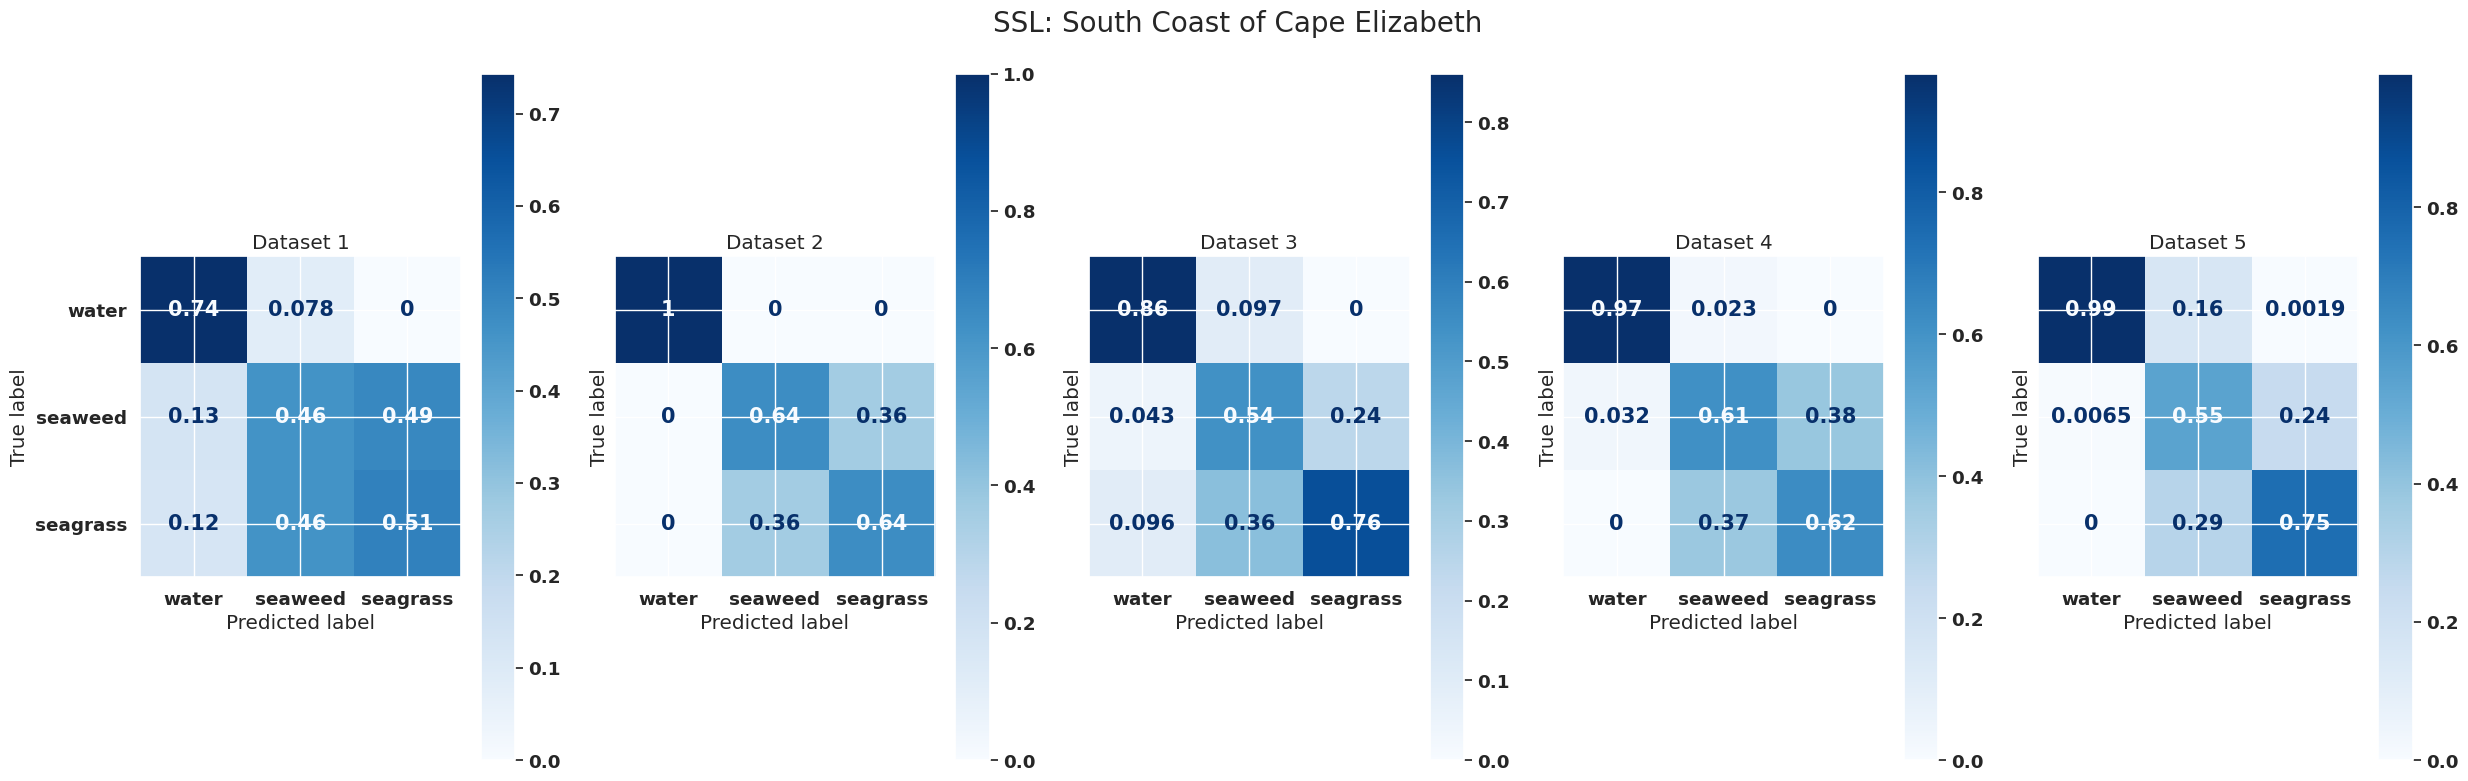

In [ ]:
cm_datsets(cm1sst, cm2sst, cm3sst,cm4sst , cm5sst, 'SSL: South Coast of Cape Elizabeth')

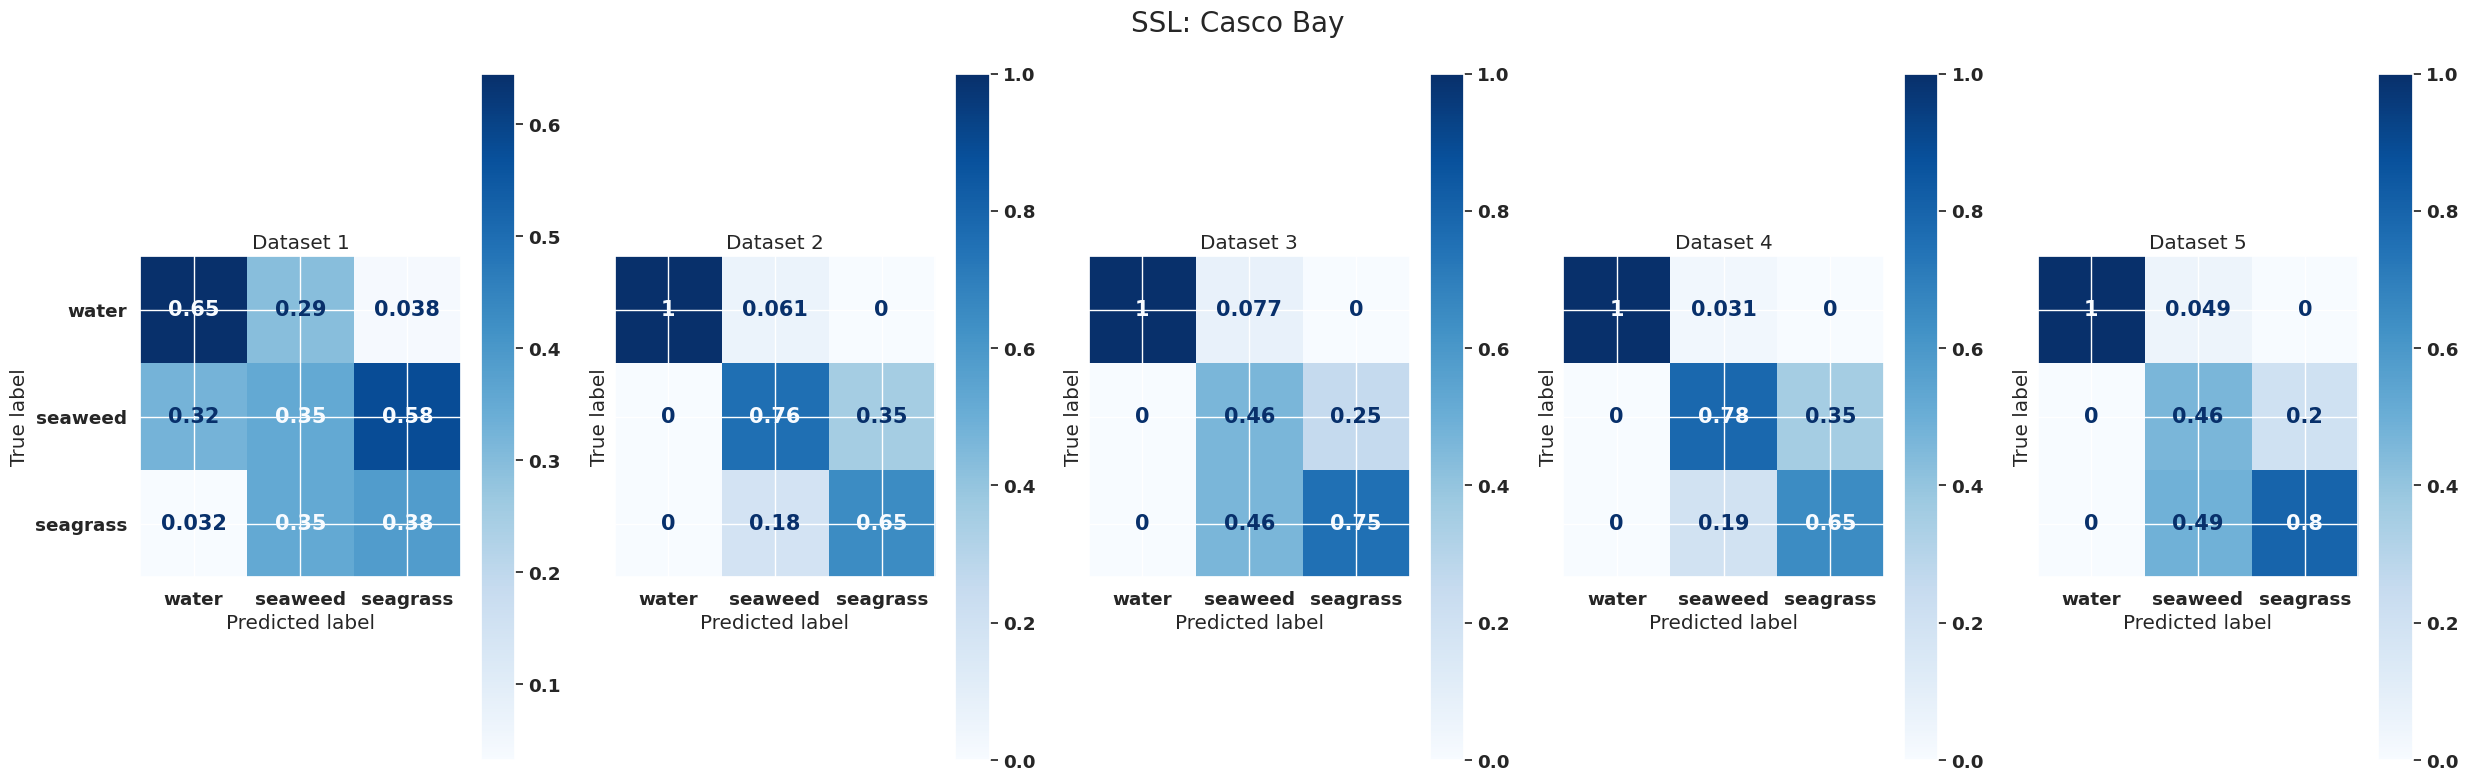

In [ ]:
cm_datsets(cm1ss, cm2ss, cm3ss,cm4ss , cm5ss, 'SSL: Casco Bay') 

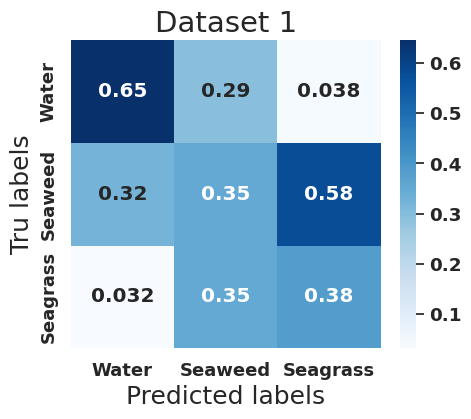

In [ ]:
cm_maker(cm1ss, 'Dataset 1')

# Summary results: Barplot comparing model OAs

In [ ]:
SML_OA = [0.57, 0.74, 0.75, 0.72, 0.73]
SSL_OA = [0.59, 0.76, 0.68, 0.74, 0.71]
UML_OA = [0.12, 0.25, 0.19, 0.22, 0.07]
dataset1 = [1,2,3,4,5]

SML_var = ['SML']*5
SSL_var = ['SSL']*5
UML_var = ['UML']*5

OA = SML_OA + SSL_OA + UML_OA
model = SML_var + SSL_var + UML_var
dataset = [1,2,3,4,5]*5

df = pd.DataFrame(list(zip(OA, model, dataset)),
               columns =['Accuracy', 'Model','Dataset'])

df.head() 

Accuracy Model  Dataset
0      0.57   SML        1
1      0.74   SML        2
2      0.75   SML        3
3      0.72   SML        4
4      0.73   SML        5

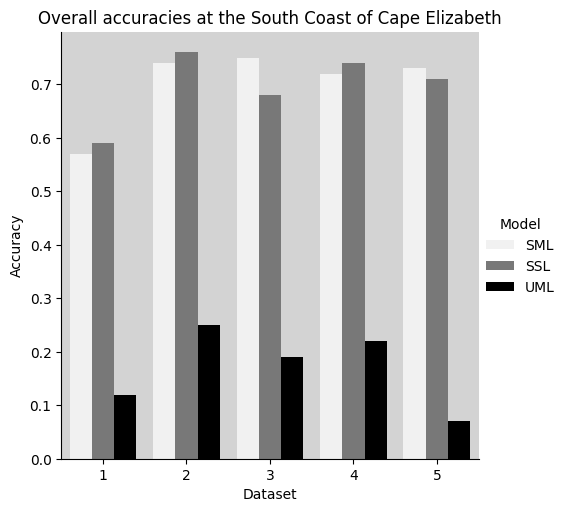

In [ ]:
sns.set_style(rc = {'axes.facecolor': 'lightgrey'})
sns.catplot(x='Dataset', y='Accuracy', hue='Model', data=df, kind='bar', color='black' ).set(title='Overall accuracies at the South Coast of Cape Elizabeth')


# Statistical significance test: SML vs SSL

In [ ]:
# source code: https://www.youtube.com/watch?v=F8f83eTm3wY. Accessed 04.05.2023
df2 = pd.DataFrame(list(zip( SML_OA, SSL_OA, UML_OA)),
               columns =['SML','SSL','UML'], index = dataset1 )
df2.index.name = 'Dataset'
df2.head()

SML   SSL   UML
Dataset                  
1        0.57  0.59  0.12
2        0.74  0.76  0.25
3        0.75  0.68  0.19
4        0.72  0.74  0.22
5        0.73  0.71  0.07

In [ ]:
df2.mean(axis=0)

SML    0.702
SSL    0.696
UML    0.170
dtype: float64

<Axes: >

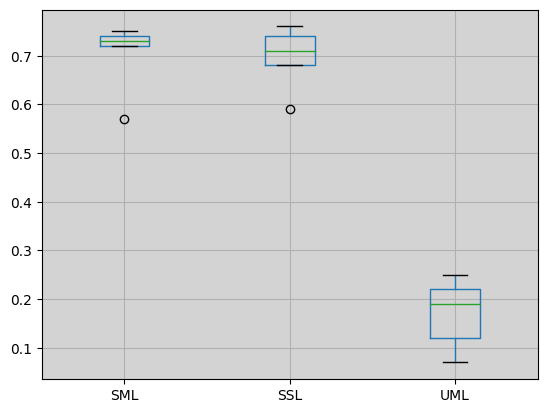

In [ ]:
df2.boxplot(column = ['SML','SSL','UML'])

In [ ]:
#from scipy.stats.mstats import ttest_rel
# H0 = there is no difference in the mean accuracy
# Use paired t-test as the classifiers are run on the same datasets

# Set significance level of 0.01. p<0.01 rejects the null-hypothesis.
scipy.stats.ttest_ind(df2.iloc[:,0],df2.iloc[:,1]) 

Ttest_indResult(statistic=0.13416407864998744, pvalue=0.8965866662252613)

In [ ]:
# Statistical significance test: PB vs GEOBIA
method = ['PB', 'PB', 'GEOBIA', 'PB', 'GEOBIA']

SML_OA = [0.57, 0.74, 0.74, 0.71, 0.72]
SSL_OA = [0.59, 0.76, 0.68, 0.74, 0.71]
UML_OA = [0.12, 0.25, 0.19, 0.22, 0.07]

rows = [SML_OA, SSL_OA, UML_OA]
model = ['SML', 'SSL', 'UML']

# source code: https://www.youtube.com/watch?v=F8f83eTm3wY. Accessed 04.05.2023
df3 = pd.DataFrame(columns = method)


In [ ]:
for i in rows: df3.loc[len(df3)] = i
df3.head()

PB    PB  GEOBIA    PB  GEOBIA
0  0.57  0.74    0.74  0.71    0.72
1  0.59  0.76    0.68  0.74    0.71
2  0.12  0.25    0.19  0.22    0.07

In [ ]:
df3.mean(axis=0)

PB        0.426667
PB        0.583333
GEOBIA    0.536667
PB        0.556667
GEOBIA    0.500000
dtype: float64

In [ ]:
from scipy.stats.mstats import ttest_rel
import scipy.stats

In [ ]:
# H0 = there is no difference in the mean accuracy between the methods
# Use paired t-test as the classifiers are run on the same datasets

# Set significance level of 0.01. p<0.01 rejects the null-hypothesis.
scipy.stats.ttest_ind(df3.iloc[:,1],df3.iloc[:,2]) 


Ttest_indResult(statistic=0.19351345927978858, pvalue=0.8559861650869495)

In [ ]:
scipy.stats.ttest_ind(df3.iloc[:,3],df3.iloc[:,4]) 

Ttest_indResult(statistic=0.20740963232699303, pvalue=0.8458213531591191)

In [ ]:
# Cheching for significant difference between drop in accuracy from soft to hard test between SML and SSL.
SML_soft = [0.67, 0.87, 0.86, 0.91, 0.81]
SSL_soft = [0.49, 0.81, 0.69, 0.82, 0.69]

SML_hard = [0.57, 0.74, 0.75, 0.72, 0.73]
SSL_hard = [0.59, 0.76, 0.68, 0.74, 0.71]
dataset1 = [1,2,3,4,5]

drop_SML = list()
for item1, item2 in zip(SML_hard, SML_soft):
    item = item1 - item2
    drop_SML.append(item)


drop_SSL = list()
for item1, item2 in zip(SSL_hard, SSL_soft):
    item = item1 - item2
    drop_SSL.append(item)


In [ ]:
# source code: https://www.youtube.com/watch?v=F8f83eTm3wY. Accessed 04.05.2023
df = pd.DataFrame(list(zip( drop_SML, drop_SSL)),
               columns =['drop_SML','drop_SSL'], index = dataset1 )
df.index.name = 'Dataset'
df.head()

drop_SML  drop_SSL
Dataset                    
1           -0.10      0.10
2           -0.13     -0.05
3           -0.11     -0.01
4           -0.19     -0.08
5           -0.08      0.02

In [ ]:
df.mean(axis=0)

drop_SML   -0.122
drop_SSL   -0.004
dtype: float64

In [ ]:
scipy.stats.ttest_ind(df.iloc[:,0],df.iloc[:,1]) 

Ttest_indResult(statistic=-3.247843107122766, pvalue=0.011738925063325256)